In [2]:
library(wooldridge)
library(stargazer)
library(knitr)


Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



In [1]:
pacman::p_load(wooldridge,stargazer,broom,tidyverse,ggplot2,
               dplyr,tidyr,moderndive,jtools,sjPlot,dotwhisker,FSA,
               car,QuantPsyc,GGally,zoo,magrittr,dummies,
              pdfetch,zoo,dynlm, leaps, bestglm)

# Kaggle knowledge competition – Bike Sharing Demand,


https://www.kaggle.com/c/bike-sharing-demand/kernels

https://www.analyticsvidhya.com/blog/2015/06/solution-kaggle-competition-bike-sharing-demand/




Training data set has 12 variables (see below) and Test has 9 (excluding registered, casual and count).

Independent Variables

datetime:   date and hour in "mm/dd/yyyy hh:mm" format
season:     Four categories-> 1 = spring, 2 = summer, 3 = fall, 4 = winter
holiday:    whether the day is a holiday or not (1/0)
workingday: whether the day is neither a weekend nor holiday (1/0)
weather:    Four Categories of weather
            1-> Clear, Few clouds, Partly cloudy, Partly cloudy
            2-> Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
            3-> Light Snow and Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
            4-> Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
temp:       hourly temperature in Celsius
atemp:      "feels like" temperature in Celsius
humidity:   relative humidity
windspeed:  wind speed



# New York City taxicab data

https://docs.timescale.com/latest/tutorials/tutorial-forecasting




#  RailTrail: Volume of Users of a Rail Trail
In mosaicData: Project MOSAIC Data Sets 

https://rdrr.io/cran/mosaicData/man/RailTrail.html



Description

The Pioneer Valley Planning Commission (PVPC) collected data north of Chestnut Street in Florence, MA for ninety days from April 5, 2005 to November 15, 2005. Data collectors set up a laser sensor, with breaks in the laser beam recording when a rail-trail user passed the data collection station. 


data(RailTrail)

A data frame with 90 observations on the following variables.

    hightemp daily high temperature (in degrees Fahrenheit)

    lowtemp daily low temperature (in degrees Fahrenheit)

    avgtemp average of daily low and daily high temperature (in degrees Fahrenheit)

    spring indicator of whether the season was Spring

    summer indicator of whether the season was Summer

    fall indicator of whether the season was Fall

    cloudcover measure of cloud cover (in oktas)

    precip measure of precipitation (in inches)

    volume estimated number of trail users that day (number of breaks recorded)

    weekday logical indicator of whether the day was a non-holiday weekday

    dayType one of "weekday" or "weekend"
    
    
    
# Riders: Volume of Users of a Massachusetts Rail Trail
In mosaicData: Project MOSAIC Data Sets

Description Usage Format Details Source References Examples

Description

The Pioneer Valley Planning Commission (PVPC) collected data north of Chestnut Street in Florence, MA for ninety days from April 5, 2005 to November 15, 2005. Data collectors set up a laser sensor, with breaks in the laser beam recording when a rail-trail user passed the data collection station.
Usage

1

	

data(Riders)


A data frame with 90 observations on the following 12 variables.

date

    date of data collection (POSIXct)
day

    a factor with levels Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, and Sunday.
highT

    high temperature for the day (in degrees Fahrenheit)
lowT

    low temperature for the day (in degrees Fahrenheit)
hi

    shorter name for highT
lo

    shorter name for lowT
precip

    inches of precipitation
clouds

    measure of cloud cover (in oktas)
riders

    estimated number of trail crossings that day (number of breaks recorded)
ct

    shorter name for riders
weekday

    type of day: a factor with levels N (weekend or holiday) Y (non-holiday weekday)
wday

    shorter name for weekday



In [2]:
library(mosaicData)
data(RailTrail)

# Fit a linear model
ride_lm <- lm(volume ~hightemp, data = RailTrail)

# View the summary of your model
summary(ride_lm)

# Print the tidy model output
tidy(ride_lm)


Call:
lm(formula = volume ~ hightemp, data = RailTrail)

Residuals:
     Min       1Q   Median       3Q      Max 
-254.562  -57.800    8.737   57.352  314.035 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.079     59.395  -0.288    0.774    
hightemp       5.702      0.848   6.724 1.71e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 104.2 on 88 degrees of freedom
Multiple R-squared:  0.3394,	Adjusted R-squared:  0.3319 
F-statistic: 45.21 on 1 and 88 DF,  p-value: 1.705e-09


term        estimate   std.error  statistic  p.value     
1 (Intercept) -17.079281 59.3953040 -0.2875527 7.743652e-01
2 hightemp      5.701878  0.8480074  6.7238541 1.705138e-09

In [3]:
head(RailTrail)

hightemp lowtemp avgtemp spring summer fall cloudcover precip volume weekday
1 83       50      66.5    0      1      0     7.6       0.00   501     TRUE  
2 73       49      61.0    0      1      0     6.3       0.29   419     TRUE  
3 74       52      63.0    1      0      0     7.5       0.32   397     TRUE  
4 95       61      78.0    0      1      0     2.6       0.00   385    FALSE  
5 44       52      48.0    1      0      0    10.0       0.14   200     TRUE  
6 69       54      61.5    1      0      0     6.6       0.02   375     TRUE  
  dayType
1 weekday
2 weekday
3 weekday
4 weekend
5 weekday
6 weekday

In [4]:
head(Riders)

date       day       highT lowT hi lo precip clouds riders ct  weekday wday
1 2005-04-05 Tuesday   62    39   62 39 0      0.8    236    236 Y       Y   
2 2005-04-06 Wednesday 75    43   75 43 0      6.3    156    156 Y       Y   
3 2005-04-07 Thursday  70    47   70 47 0      9.9    328    328 Y       Y   
4 2005-04-08 Friday    65    48   65 48 0      7.2    418    418 Y       Y   
5 2005-04-09 Saturday  66    38   66 38 0      0.0    629    629 N       N   
6 2005-04-10 Sunday    74    33   74 33 0      2.5    635    635 N       N

In [5]:
dim(Riders)

[1] 90 12

In [6]:
pacman::p_load(forecast,tidyquant,SparkR,weathercan)

In [8]:
library(forecast)
library(tidyquant)
library(timetk)
# library(sweep)

In [9]:
# Riders

In [10]:
glimpse(Riders)

Observations: 90
Variables: 12
$ date    <dttm> 2005-04-05, 2005-04-06, 2005-04-07, 2005-04-08, 2005-04-09, …
$ day     <fct> Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday, Monda…
$ highT   <int> 62, 75, 70, 65, 66, 74, 56, 54, 59, 64, 62, 70, 80, 76, 81, 8…
$ lowT    <int> 39, 43, 47, 48, 38, 33, 38, 32, 34, 41, 36, 30, 33, 44, 39, 5…
$ hi      <int> 62, 75, 70, 65, 66, 74, 56, 54, 59, 64, 62, 70, 80, 76, 81, 8…
$ lo      <int> 39, 43, 47, 48, 38, 33, 38, 32, 34, 41, 36, 30, 33, 44, 39, 5…
$ precip  <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0…
$ clouds  <dbl> 0.8, 6.3, 9.9, 7.2, 0.0, 2.5, 0.0, 3.6, 2.4, 3.4, 0.0, 0.0, 0…
$ riders  <int> 236, 156, 328, 418, 629, 635, 335, 304, 344, 349, 259, 461, 6…
$ ct      <int> 236, 156, 328, 418, 629, 635, 335, 304, 344, 349, 259, 461, 6…
$ weekday <fct> Y, Y, Y, Y, N, N, Y, Y, Y, Y, Y, N, N, N, Y, Y, Y, Y, N, Y, Y…
$ wday    <fct> Y, Y, Y, Y, N, N, Y, Y, Y, Y, Y, N, N, N, Y, Y, Y, Y, N, Y, Y…


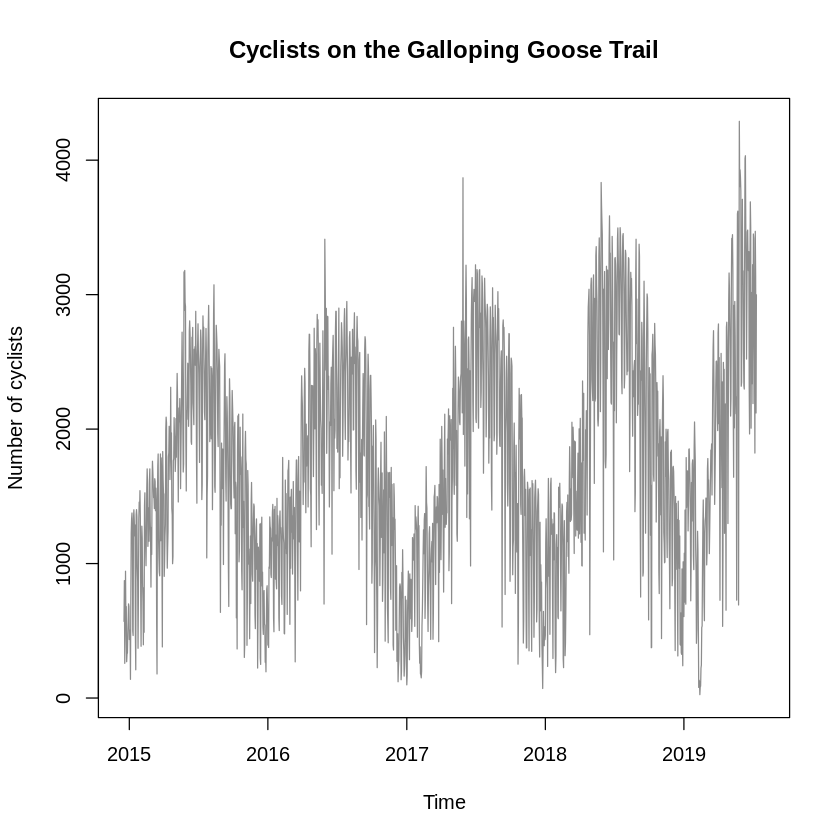

In [11]:
dat <- read.csv("goose_competition.csv") #you may have to change the working directory to the location where the downloaded file is stored.
dat$date<-as.Date(dat$date)
plot(dat$date,dat$bikes, type="l", col="gray55",xlab="Time", ylab="Number of cyclists", main="Cyclists on the Galloping Goose Trail")

# Generate time dimension variables

In [15]:
bike = dat %>% dplyr::mutate(weekday = lubridate::wday(date),
                             yearday = lubridate::yday(date),
                            month=lubridate::month(date), 
                             quarter = lubridate::quarter(date),
                 year = lubridate::year(date)) 

In [16]:
head(bike)

date       bikes_count Jan Feb Mar Apr May Jun Jul Aug ⋯ Dec weekend trend
1 2014-12-18 570         0   0   0   0   0   0   0   0   ⋯ 1   0       1    
2 2014-12-19 873         0   0   0   0   0   0   0   0   ⋯ 1   0       2    
3 2014-12-20 258         0   0   0   0   0   0   0   0   ⋯ 1   1       3    
4 2014-12-21 460         0   0   0   0   0   0   0   0   ⋯ 1   1       4    
5 2014-12-22 943         0   0   0   0   0   0   0   0   ⋯ 1   0       5    
6 2014-12-23 556         0   0   0   0   0   0   0   0   ⋯ 1   0       6    
  trend_sq trend_cub weekday yearday month quarter year
1  1         1       5       352     12    4       2014
2  4         8       6       353     12    4       2014
3  9        27       7       354     12    4       2014
4 16        64       1       355     12    4       2014
5 25       125       2       356     12    4       2014
6 36       216       3       357     12    4       2014

## Construct a time series object

In [18]:
bike_ts = ts(bike, start = c(2014,12,18), frequency = 365)

## Use autoplot to plot time series data

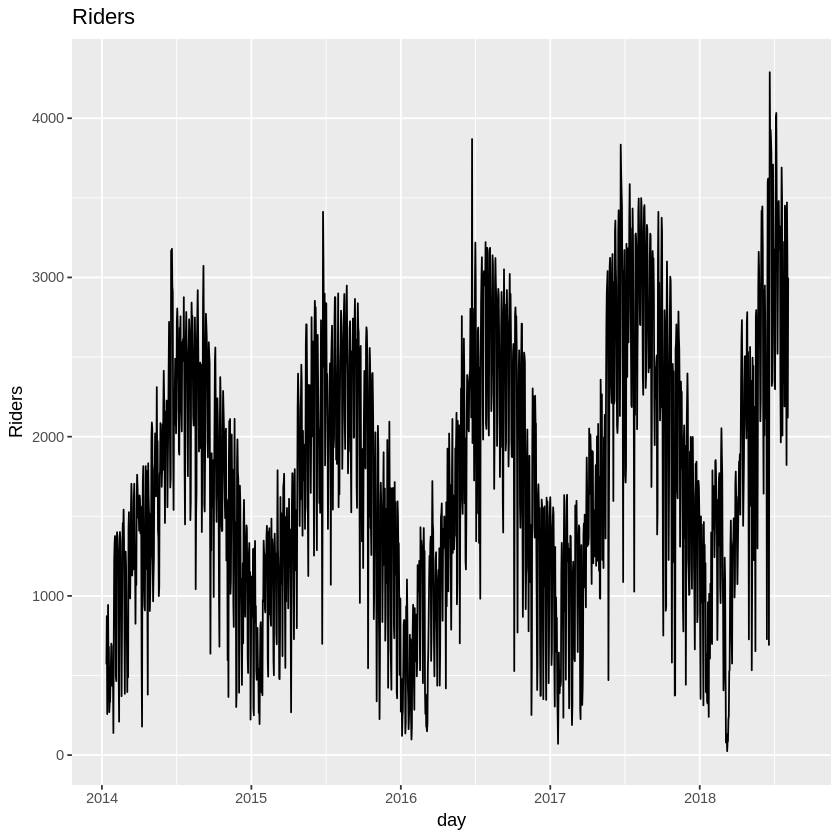

In [10]:
autoplot(bike_ts[,"bikes_count"]) +
  ggtitle("Riders") +
  xlab("day") +
  ylab("Riders")

Warning message:
“Removed 20 rows containing missing values (geom_path).”Warning message:
“Removed 1 rows containing missing values (geom_text).”

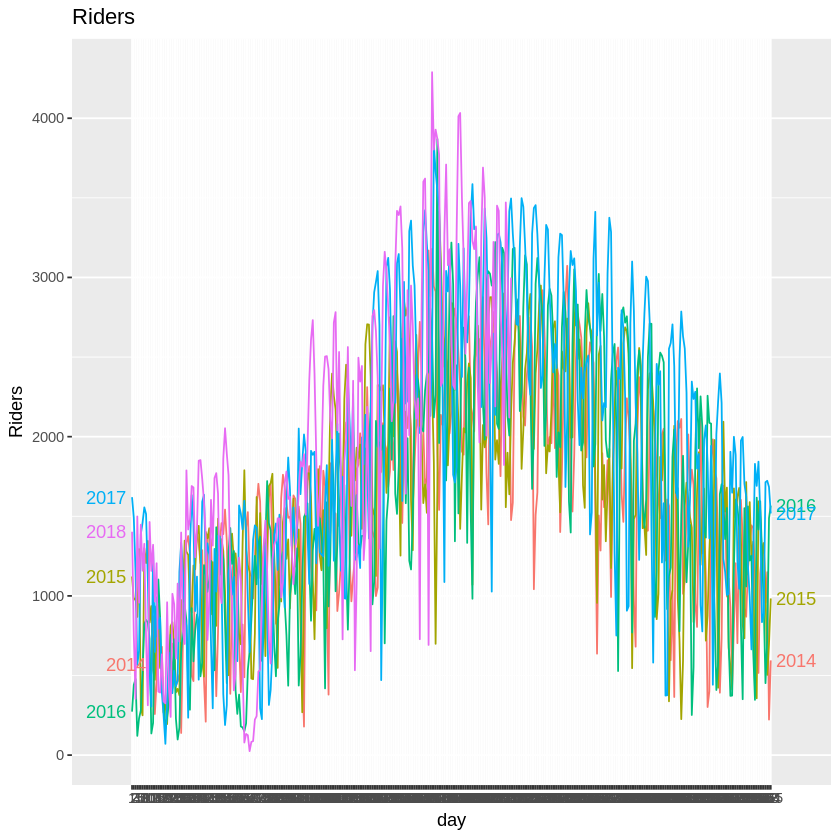

In [19]:
ggseasonplot(bike_ts[,"bikes_count"] ,year.labels=TRUE, year.labels.left=TRUE) +
  ggtitle("Riders") +
  xlab("day") +
  ylab("Riders")



# Monthly Rider data

In [20]:
bike_month = bike %>% dplyr::group_by(year, month) %>% summarise(month.bikes = sum(bikes_count))  %>%
ts(start = c(2014,12),frequency = 12) 

Warning message:
“Removed 1 rows containing missing values (geom_path).”Warning message:
“Removed 1 rows containing missing values (geom_text).”

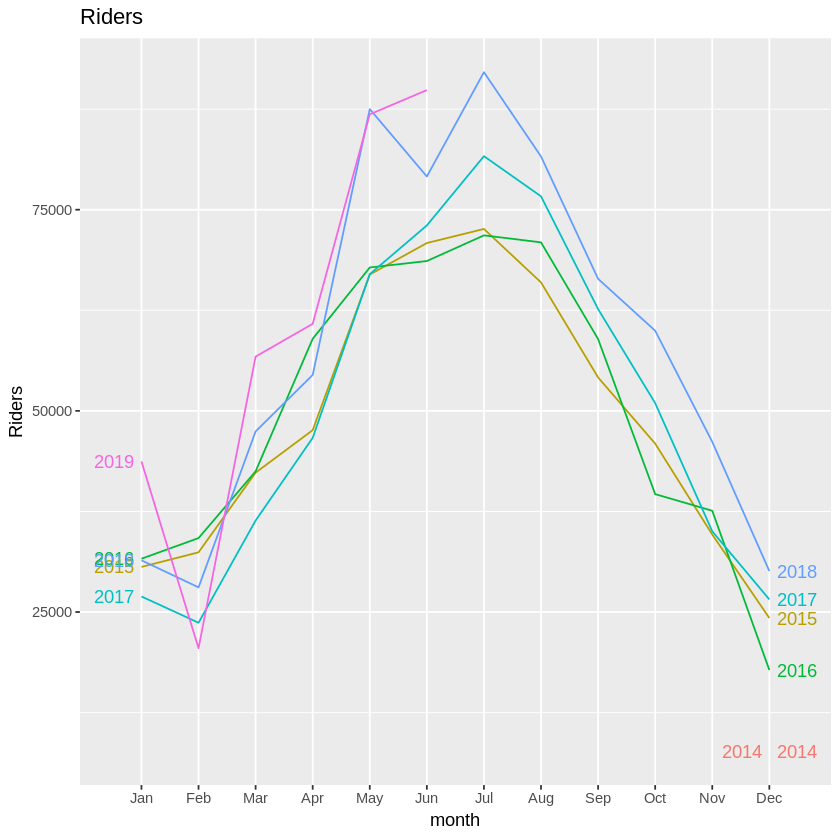

In [88]:
ggseasonplot(bike_month[,"month.bikes"] ,year.labels=TRUE, year.labels.left=TRUE) +
  ggtitle("Riders") +
  xlab("month") +
  ylab("Riders")


Warning message:
“Removed 1 rows containing missing values (geom_path).”Warning message:
“Removed 5 rows containing missing values (geom_path).”

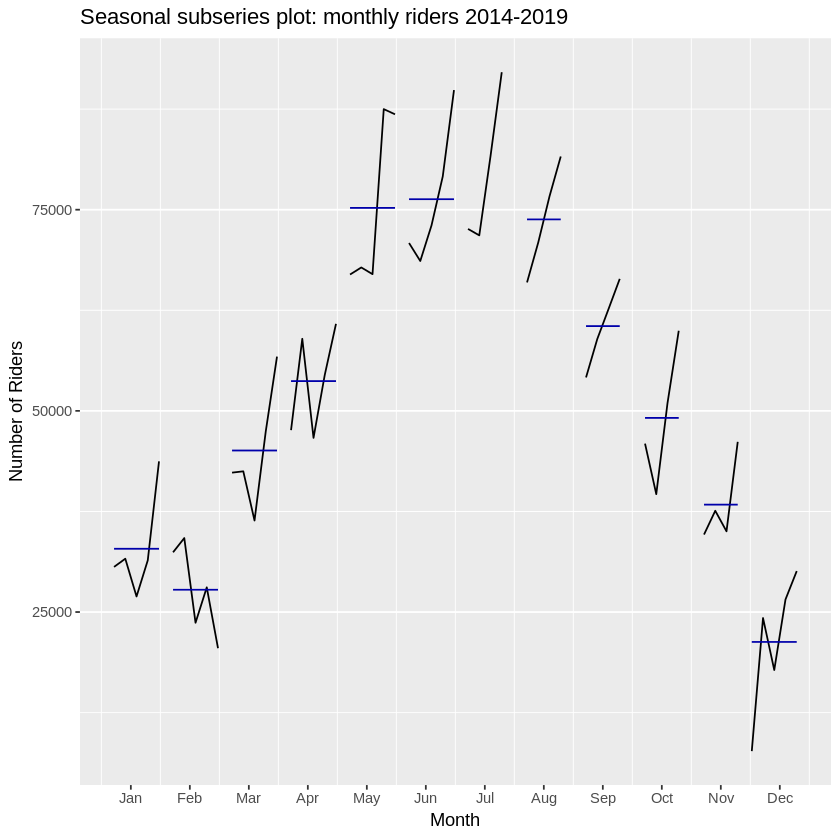

In [96]:
ggsubseriesplot(bike_month[,"month.bikes"]) +
  ylab("Number of Riders") +
  ggtitle("Seasonal subseries plot: monthly riders 2014-2019")

Warning message:
“Removed 1 rows containing missing values (geom_path).”

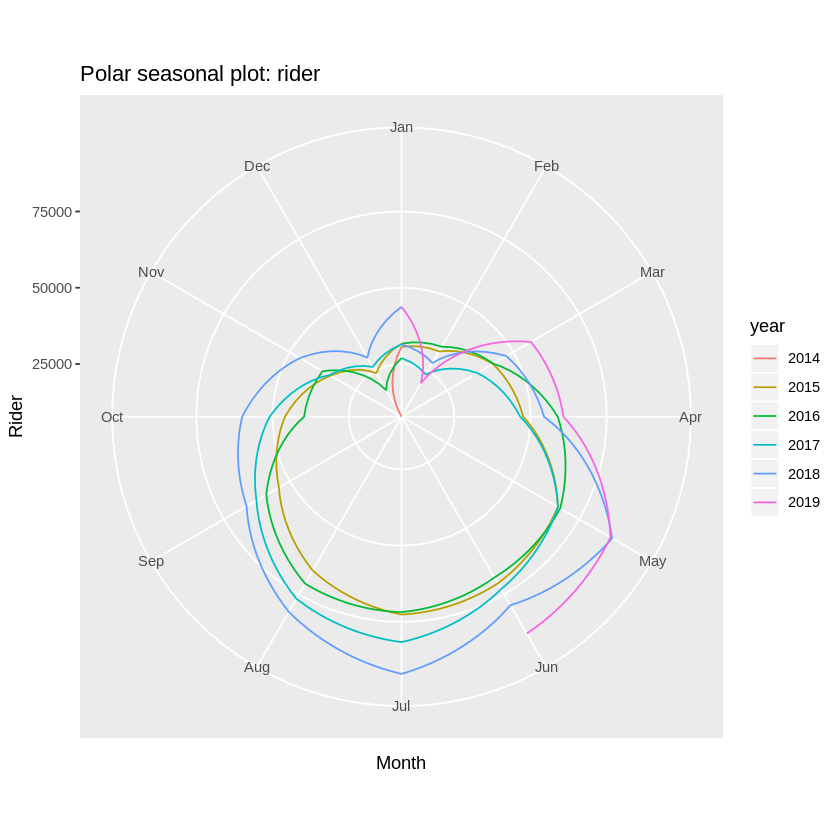

In [89]:
ggseasonplot(bike_month[,"month.bikes"], polar=TRUE) +
  ylab("Rider") +
  ggtitle("Polar seasonal plot: rider")

In [99]:
glimpse(bike)

Observations: 1,686
Variables: 23
$ date        <date> 2014-12-18, 2014-12-19, 2014-12-20, 2014-12-21, 2014-12-…
$ bikes_count <int> 570, 873, 258, 460, 943, 556, 680, 270, 327, 335, 479, 58…
$ Jan         <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, …
$ Feb         <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ Mar         <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ Apr         <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ May         <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ Jun         <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ Jul         <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ Aug         <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ Sep         <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ Oct         <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ Nov         <int

In [21]:
tail(bike, 30)

date       bikes_count Jan Feb Mar Apr May Jun Jul Aug ⋯ Dec weekend trend
1657 2019-07-02 2190        0   0   0   0   0   0   1   0   ⋯ 0   0       1657 
1658 2019-07-03 3451        0   0   0   0   0   0   1   0   ⋯ 0   0       1658 
1659 2019-07-04 3418        0   0   0   0   0   0   1   0   ⋯ 0   0       1659 
1660 2019-07-05 2802        0   0   0   0   0   0   1   0   ⋯ 0   0       1660 
1661 2019-07-06 2508        0   0   0   0   0   0   1   0   ⋯ 0   1       1661 
1662 2019-07-07 1822        0   0   0   0   0   0   1   0   ⋯ 0   1       1662 
1663 2019-07-08 3471        0   0   0   0   0   0   1   0   ⋯ 0   0       1663 
1664 2019-07-09 3140        0   0   0   0   0   0   1   0   ⋯ 0   0       1664 
1665 2019-07-10 2120        0   0   0   0   0   0   1   0   ⋯ 0   0       1665 
1666 2019-07-11 2999        0   0   0   0   0   0   1   0   ⋯ 0   0       1666 
1667 2019-07-12   NA        0   0   0   0   0   0   1   0   ⋯ 0   0       1667 
1668 2019-07-13   NA        0   0   0   0   0   0   1   0   ⋯ 0   1       1668 
1669 2019-07-14   NA        0   0   0   0   0   0   1   0   ⋯ 0   1       1669 
1670 2019-07-15   NA        0   0   0   0   0   0   1   0   ⋯ 0   0       1670 
1671 2019-07-16   NA        0   0   0   0   0   0   1   0   ⋯ 0   0       1671 
1672 2019-07-17   NA        0   0   0   0   0   0   1   0   ⋯ 0   0       1672 
1673 2019-07-18   NA        0   0   0   0   0   0   1   0   ⋯ 0   0       1673 
1674 2019-07-19   NA        0   0   0   0   0   0   1   0   ⋯ 0   0       1674 
1675 2019-07-20   NA        0   0   0   0   0   0   1   0   ⋯ 0   1       1675 
1676 2019-07-21   NA        0   0   0   0   0   0   1   0   ⋯ 0   1       1676 
1677 2019-07-22   NA        0   0   0   0   0   0   1   0   ⋯ 0   0       1677 
1678 2019-07-23   NA        0   0   0   0   0   0   1   0   ⋯ 0   0       1678 
1679 2019-07-24   NA        0   0   0   0   0   0   1   0   ⋯ 0   0       1679 
1680 2019-07-25   NA        0   0   0   0   0   0   1   0   ⋯ 0   0       1680 
1681 2019-07-26   NA        0   0   0   0   0   0   1   0   ⋯ 0   0       1681 
1682 2019-07-27   NA        0   0   0   0   0   0   1   0   ⋯ 0   1       1682 
1683 2019-07-28   NA        0   0   0   0   0   0   1   0   ⋯ 0   1       1683 
1684 2019-07-29   NA        0   0   0   0   0   0   1   0   ⋯ 0   0       1684 
1685 2019-07-30   NA        0   0   0   0   0   0   1   0   ⋯ 0   0       1685 
1686 2019-07-31   NA        0   0   0   0   0   0   1   0   ⋯ 0   0       1686 
     trend_sq trend_cub  weekday yearday month quarter year
1657 2745649  4549540393 3       183     7     3       2019
1658 2748964  4557782312 4       184     7     3       2019
1659 2752281  4566034179 5       185     7     3       2019
1660 2755600  4574296000 6       186     7     3       2019
1661 2758921  4582567781 7       187     7     3       2019
1662 2762244  4590849528 1       188     7     3       2019
1663 2765569  4599141247 2       189     7     3       2019
1664 2768896  4607442944 3       190     7     3       2019
1665 2772225  4615754625 4       191     7     3       2019
1666 2775556  4624076296 5       192     7     3       2019
1667 2778889  4632407963 6       193     7     3       2019
1668 2782224  4640749632 7       194     7     3       2019
1669 2785561  4649101309 1       195     7     3       2019
1670 2788900  4657463000 2       196     7     3       2019
1671 2792241  4665834711 3       197     7     3       2019
1672 2795584  4674216448 4       198     7     3       2019
1673 2798929  4682608217 5       199     7     3       2019
1674 2802276  4691010024 6       200     7     3       2019
1675 2805625  4699421875 7       201     7     3       2019
1676 2808976  4707843776 1       202     7     3       2019
1677 2812329  4716275733 2       203     7     3       2019
1678 2815684  4724717752 3       204     7     3       2019
1679 2819041  4733169839 4       205     7     3       2019
1680 2822400  4741632000 5       206     7     3       2019
1681 2825761  4750104241 

##  Goose Trail Rider Forecasting



### Weather data

http://climate.weather.gc.ca/climate_data/daily_data_e.html?StationID=51442

http://ropensci.github.io/weathercan/



In [98]:
stations_search("Victoria", interval = "hour")

prov station_name           station_id climate_id WMO_id TC_id lat   lon    
1  MB   VICTORIA BEACH (AUT)   9035       5032951    71552  WII   50.70  -96.57
2  BC   VICTORIA GONZALES CS   114        1018611    71200  WLM   48.41 -123.32
3  BC   VICTORIA GONZALES HTS  113        1018610    NA     WLM   48.41 -123.33
4  BC   VICTORIA HARBOUR A     10944      1018615    NA     YWH   48.42 -123.39
5  BC   VICTORIA HARBOUR A     53478      1018619    NA     YWH   48.42 -123.39
6  BC   VICTORIA HARBOUR A     53479      1018633    NA     YWH   48.42 -123.39
7  BC   VICTORIA HARTLAND CS   11007      1018FJ5    NA     NA    48.53 -123.46
8  BC   VICTORIA INT'L A       118        1018620    71799  YYJ   48.65 -123.43
9  BC   VICTORIA INTL A        51337      1018621    71799  YYJ   48.65 -123.43
10 BC   VICTORIA MARINE        121        1018642    NA     NA    48.37 -123.75
11 BC   VICTORIA UNIVERSITY CS 6812       1018598    71783  WYJ   48.46 -123.30
   elev   tz        interval start end 
1  220.10 Etc/GMT+6 hour     1996  2018
2   61.04 Etc/GMT+8 hour     1994  2018
3   69.50 Etc/GMT+8 hour     1953  2000
4    0.00 Etc/GMT+8 hour     1994  2015
5    0.00 Etc/GMT+8 hour     2015  2018
6    0.00 Etc/GMT+8 hour     2015  2018
7  154.10 Etc/GMT+8 hour     1994  2012
8   19.51 Etc/GMT+8 hour     1953  2013
9   19.50 Etc/GMT+8 hour     2013  2018
10  31.70 Etc/GMT+8 hour     1967  1992
11  60.10 Etc/GMT+8 hour     1994  2018

In [22]:
# vic <- weather_dl(station_ids = 51337, start = "2014-12-18", end = "2019-07-11")
vic = readr::read_csv("vic_weather_2014_2019.csv")

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  .default = col_character(),
  X1 = col_integer(),
  station_id = col_integer(),
  lat = col_double(),
  lon = col_double(),
  elev = col_double(),
  climate_id = col_integer(),
  WMO_id = col_integer(),
  date = col_date(format = ""),
  time = col_datetime(format = ""),
  year = col_integer(),
  hour = col_time(format = ""),
  pressure = col_double(),
  rel_hum = col_integer(),
  temp = col_double(),
  temp_dew = col_double(),
  visib = col_double(),
  wind_chill = col_integer(),
  wind_dir = col_integer(),
  wind_spd = col_integer()
)
See spec(...) for full column specifications.


In [23]:
vic %>% glimpse()

Observations: 40,008
Variables: 36
$ X1               <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 1…
$ station_name     <chr> "VICTORIA INTL A", "VICTORIA INTL A", "VICTORIA INTL…
$ station_id       <int> 51337, 51337, 51337, 51337, 51337, 51337, 51337, 513…
$ station_operator <chr> "NAV Canada", "NAV Canada", "NAV Canada", "NAV Canad…
$ prov             <chr> "BC", "BC", "BC", "BC", "BC", "BC", "BC", "BC", "BC"…
$ lat              <dbl> 48.65, 48.65, 48.65, 48.65, 48.65, 48.65, 48.65, 48.…
$ lon              <dbl> -123.43, -123.43, -123.43, -123.43, -123.43, -123.43…
$ elev             <dbl> 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5, 19.5…
$ climate_id       <int> 1018621, 1018621, 1018621, 1018621, 1018621, 1018621…
$ WMO_id           <int> 71799, 71799, 71799, 71799, 71799, 71799, 71799, 717…
$ TC_id            <chr> "YYJ", "YYJ", "YYJ", "YYJ", "YYJ", "YYJ", "YYJ", "YY…
$ date             <date> 2014-12-18, 2014-12-18, 2014-12-18, 2014-12-18, 201…
$ time           

In [24]:
# write.csv(vic,"vic_weather_2014_2019.csv")

## Aggregate hourly data up to daily data

In [26]:
vic_day = vic %>% dplyr::group_by(date) %>% summarise(hi_temp = max(temp),
                                              low_temp = min(temp),
                                              hi_visib = max(visib),
                                              low_visib = min(visib),
                                              hi_wind_spd = max(wind_spd),
                                              low_wind_spd = min(wind_spd),
                                               hi_rel_hum =max(rel_hum),
                                               low_rel_hum=min(rel_hum),
                                               hi_pressure=max(pressure),
                                               low_pressure=min(pressure),
                                              weather = names(which.max(table(weather)))) 

In [27]:
glimpse(vic_day)

Observations: 1,667
Variables: 12
$ date         <date> 2014-12-18, 2014-12-19, 2014-12-20, 2014-12-21, 2014-12…
$ hi_temp      <dbl> 9.6, 9.5, 13.4, 11.7, 8.7, 8.4, 8.8, 6.8, 5.2, 9.3, 6.3,…
$ low_temp     <dbl> 6.0, 4.7, 8.1, 8.3, 2.2, 4.9, 2.6, 1.0, 0.6, 3.4, 0.9, 0…
$ hi_visib     <dbl> 48.3, 48.3, 48.3, 48.3, 48.3, 32.2, 48.3, 48.3, 48.3, 48…
$ low_visib    <dbl> 2.4, 24.1, 4.8, 24.1, 19.3, 4.8, 32.2, 48.3, 2.4, 3.2, 1…
$ hi_wind_spd  <dbl> 31, 24, 40, 34, 18, 27, 18, 14, 9, 19, 22, 40, 32, 10, 1…
$ low_wind_spd <dbl> 1, 1, 6, 5, 2, 1, 1, 2, 0, 1, 5, 5, 1, 1, 3, 1, 2, 4, 5,…
$ hi_rel_hum   <dbl> 99, 98, 98, 82, 96, 98, 97, 97, 99, 97, 97, 88, 88, 97, …
$ low_rel_hum  <dbl> 78, 72, 73, 61, 74, 79, 66, 75, 92, 66, 73, 38, 36, 67, …
$ hi_pressure  <dbl> 101.09, 101.01, 100.61, 101.60, 102.64, 102.42, 101.48, …
$ low_pressure <dbl> 100.10, 100.28, 98.99, 99.62, 101.67, 101.38, 100.93, 10…
$ weather      <chr> "Rain", "Mostly Cloudy", "Rain", "Mostly Cloudy", "Cloud…


# Left Join weather data to rider data

In [28]:
vic_bike_weather = dplyr::left_join(x = bike, y = vic_day, by = 'date')

In [29]:
vic_bike_weather %>% glimpse

Observations: 1,686
Variables: 34
$ date         <date> 2014-12-18, 2014-12-19, 2014-12-20, 2014-12-21, 2014-12…
$ bikes_count  <int> 570, 873, 258, 460, 943, 556, 680, 270, 327, 335, 479, 5…
$ Jan          <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,…
$ Feb          <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ Mar          <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ Apr          <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ May          <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ Jun          <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ Jul          <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ Aug          <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ Sep          <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ Oct          <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ Nov          <in

In [127]:
paste(colnames(vic_bike_weather),collapse = ',')

[1] "date,bikes_count,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,weekend,trend,trend_sq,trend_cub,weekday,yearday,month,quarter,year,hi_temp,low_temp,hi_visib,low_visib,hi_wind_spd,low_wind_spd,hi_rel_hum,low_rel_hum,hi_pressure,low_pressure,weather"

In [125]:
library("PerformanceAnalytics")

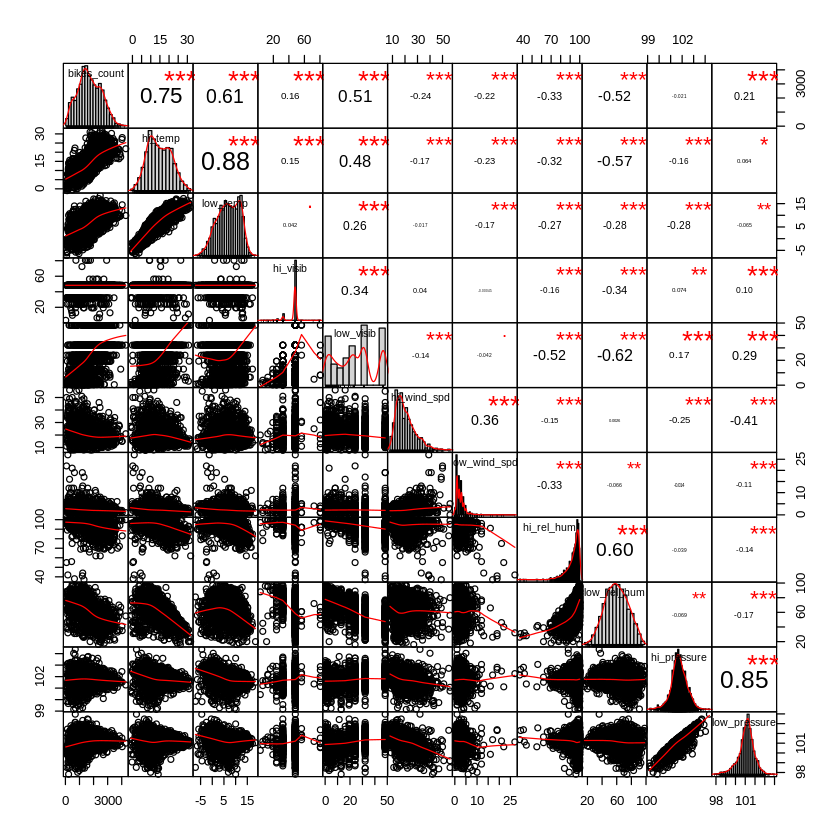

In [132]:
vic_bike_weather %>% dplyr::select(bikes_count,hi_temp,low_temp,hi_visib,low_visib,hi_wind_spd,low_wind_spd,hi_rel_hum,low_rel_hum,hi_pressure,low_pressure)  %>% chart.Correlation(histogram=TRUE, pch=19)


Attaching package: ‘psych’

The following object is masked from ‘package:SparkR’:

    describe

The following object is masked from ‘package:boot’:

    logit

The following object is masked from ‘package:car’:

    logit

The following object is masked from ‘package:FSA’:

    headtail

The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



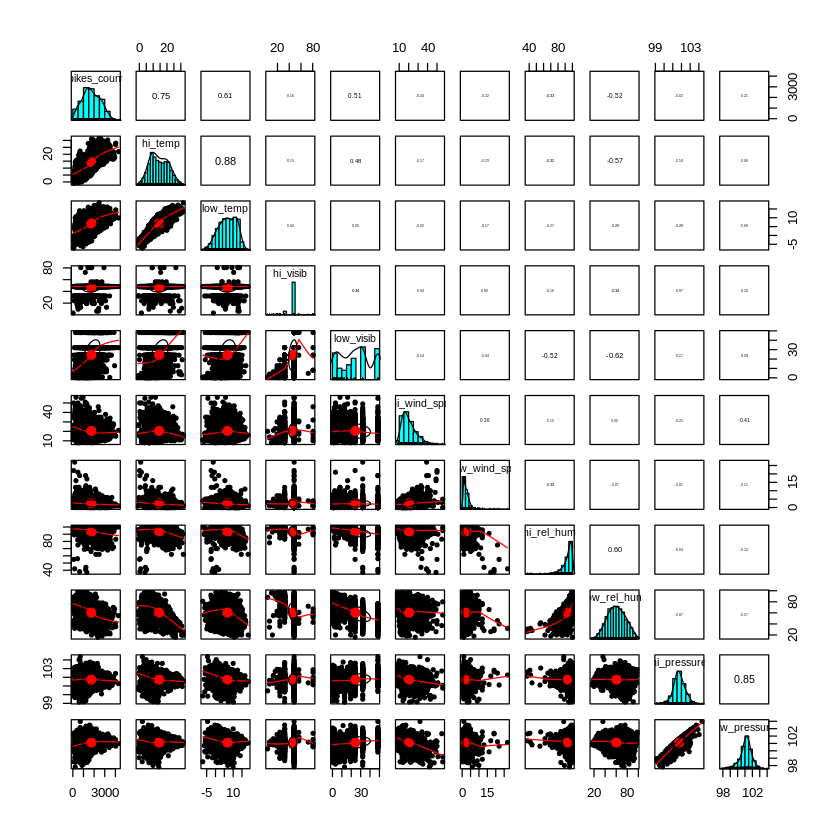

In [133]:
# library(psych)

# vic_bike_weather %>% dplyr::select(bikes_count,hi_temp,low_temp,hi_visib,
#                                    low_visib,hi_wind_spd,low_wind_spd,hi_rel_hum,
#                                    low_rel_hum,hi_pressure,low_pressure) %>%
#                                     pairs.panels( scale=TRUE)

In [139]:
# library(corrplot)



# vic_bike_weather %>% dplyr::select(bikes_count,hi_temp,low_temp,hi_visib,
#                                    low_visib,hi_wind_spd,low_wind_spd,hi_rel_hum,
#                                    low_rel_hum,hi_pressure,low_pressure)  %>% cor(.) %>% 
#                                     corrplot.mixed(order="hclust", tl.col="black")

In [18]:
# library(GGally)

# vic_bike_weather %>% dplyr::select(bikes_count,hi_temp,low_temp,hi_visib,
#                                    low_visib,hi_wind_spd,low_wind_spd,hi_rel_hum,
#                                    low_rel_hum,hi_pressure,low_pressure)  %>% ggpairs()

# Convert to Time Series Object

In [19]:
vic_bike_weather_ts = vic_bike_weather %>% ts(start = c(2014,12,18), frequency = 365)

Warning message in data.matrix(data):
“NAs introduced by coercion”

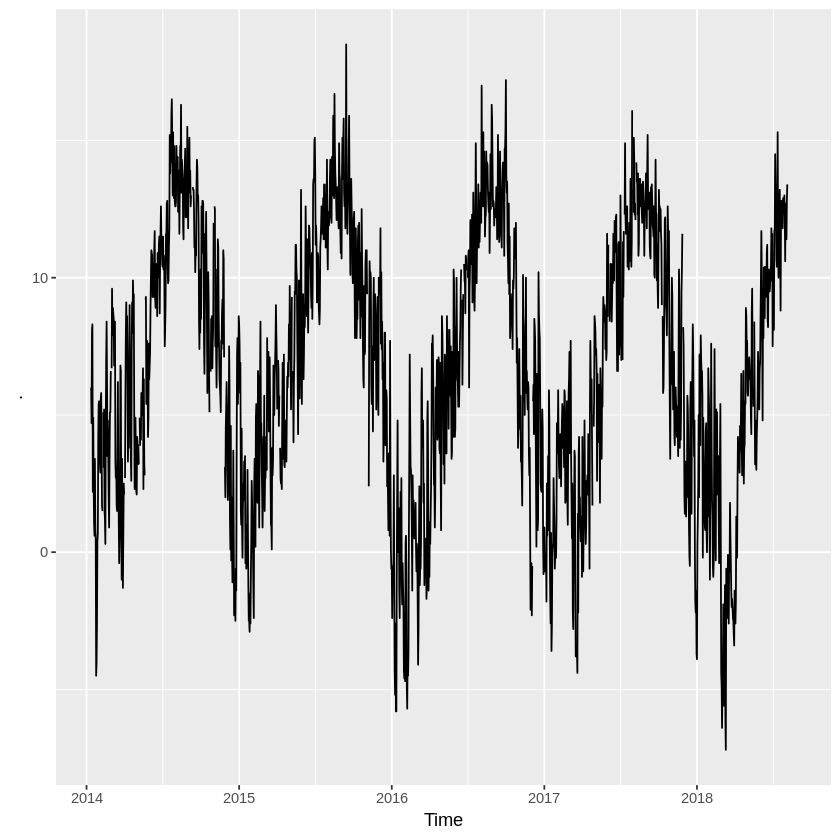

In [20]:
vic_bike_weather_ts[,"low_temp"] %>% autoplot()

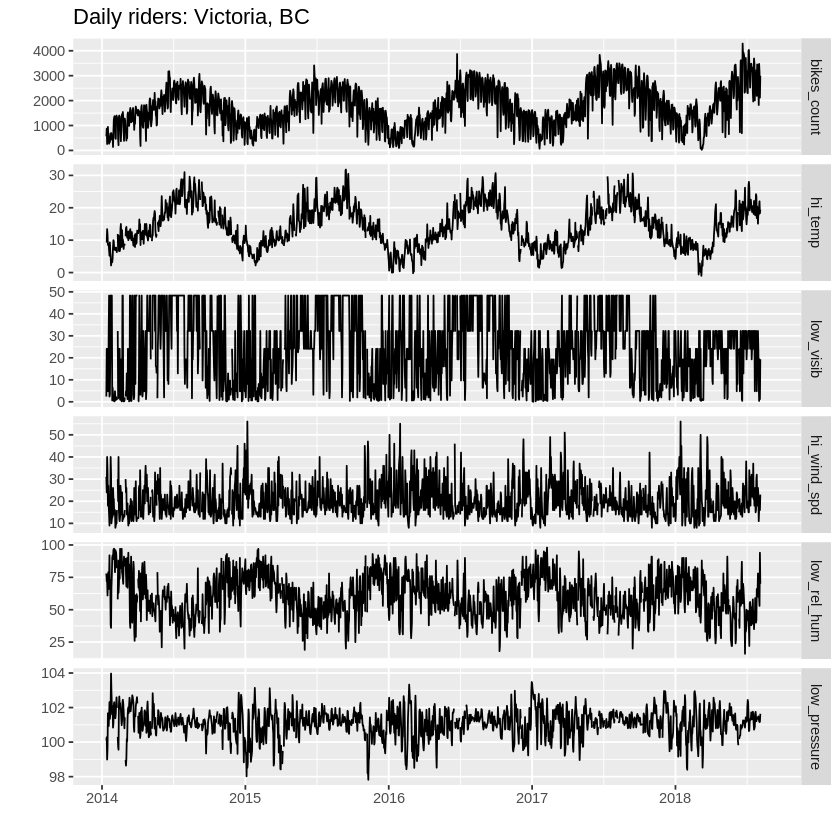

In [180]:
autoplot(vic_bike_weather_ts[,c("bikes_count",'hi_temp',
                                   'low_visib','hi_wind_spd',
                                   'low_rel_hum','low_pressure')], facets=TRUE) +
  xlab("") + ylab("") +
  ggtitle("Daily riders: Victoria, BC")

In [ ]:
# # Add correlation coefficients
# # --------------------------------
# # argument lab = TRUE
# ggcorrplot(corr, hc.order = TRUE, type = "lower",
#    lab = TRUE)

Warning message:
“Removed 20 rows containing non-finite values (stat_boxplot).”

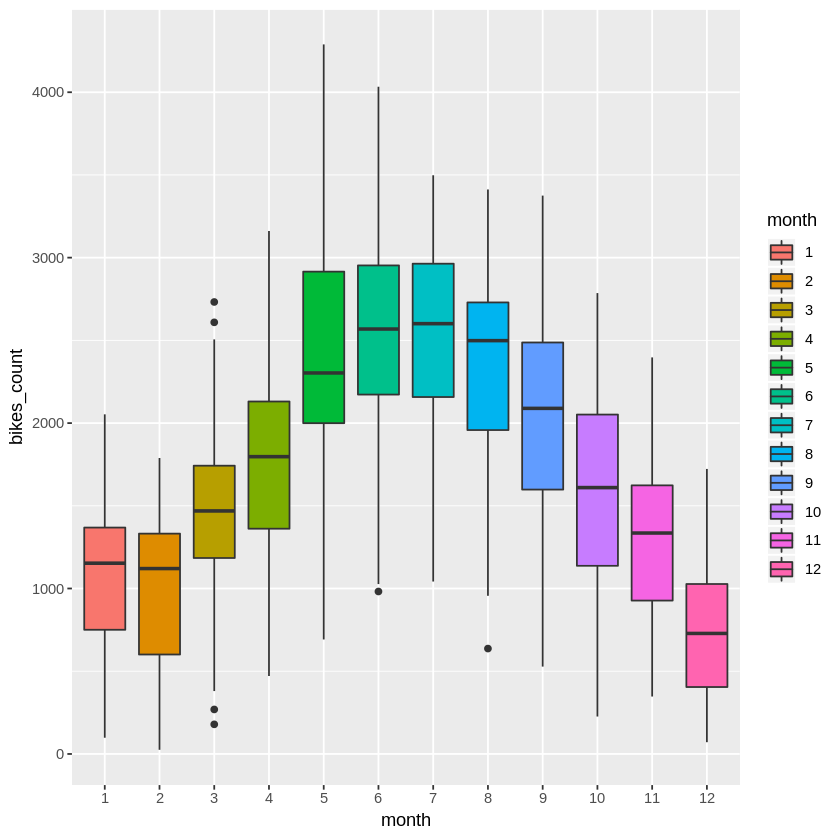

In [35]:
vic_bike_weather %>% dplyr::mutate(month = factor(month)) %>% 
ggplot(aes(x = month,  y = bikes_count, group = month)) + geom_boxplot( aes(fill=month))

Warning message:
“Removed 51 rows containing non-finite values (stat_boxplot).”

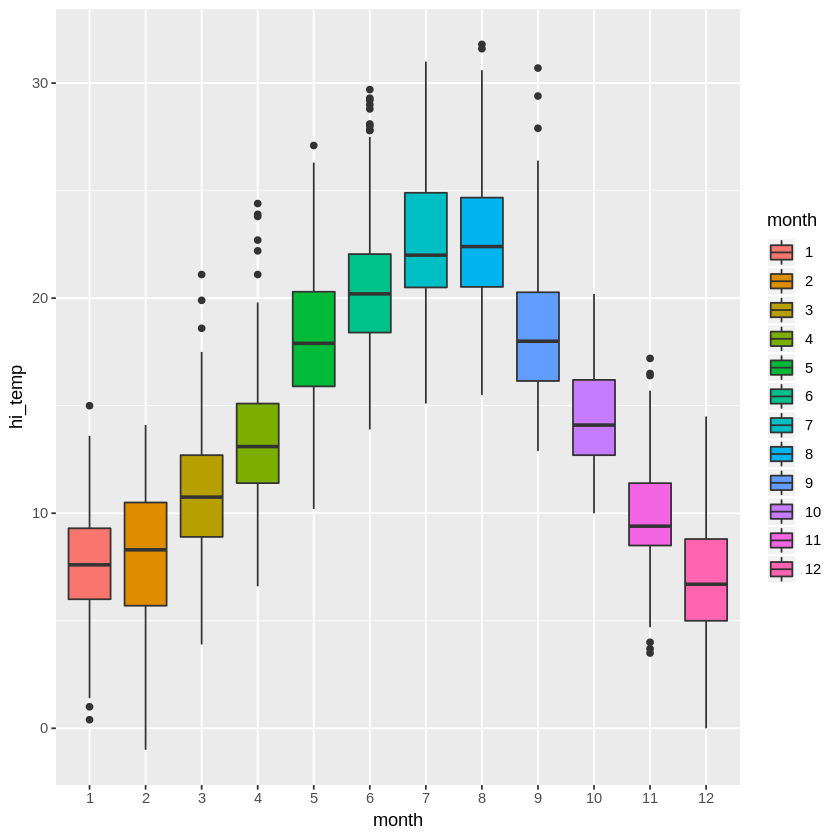

In [36]:
vic_bike_weather %>% dplyr::mutate(month = factor(month)) %>% 
ggplot(aes(x = month,  y = hi_temp, group = month)) + geom_boxplot( aes(fill=month))

Warning message:
“Removed 53 rows containing non-finite values (stat_boxplot).”

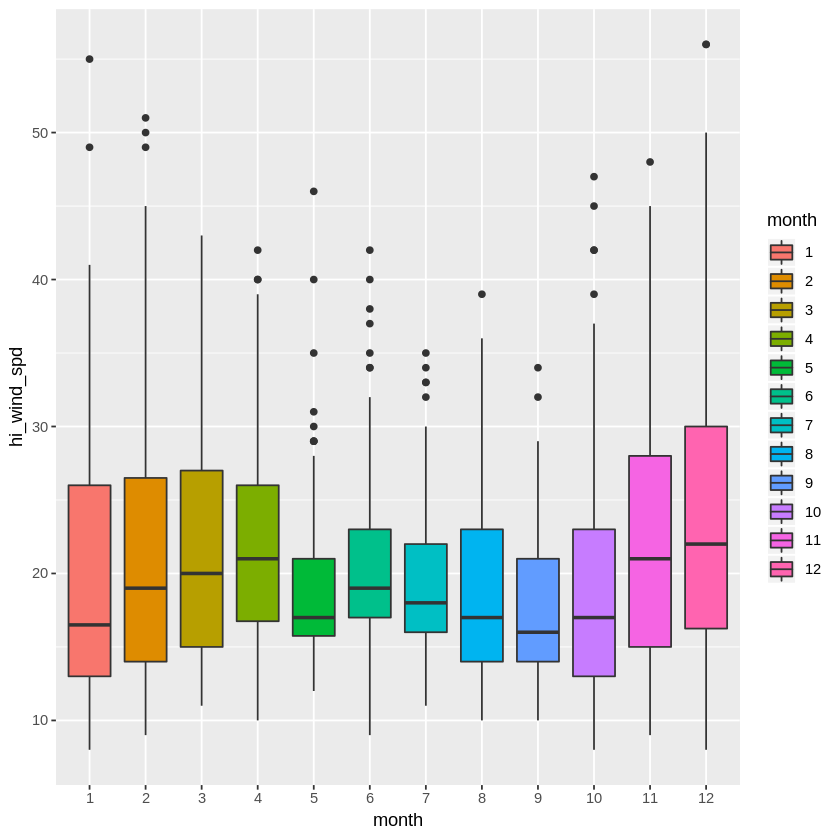

In [37]:
vic_bike_weather %>% dplyr::mutate(month = factor(month)) %>% 
ggplot(aes(x = month,  y = hi_wind_spd, group = month)) + geom_boxplot( aes(fill=month))

Warning message:
“Removed 52 rows containing non-finite values (stat_boxplot).”

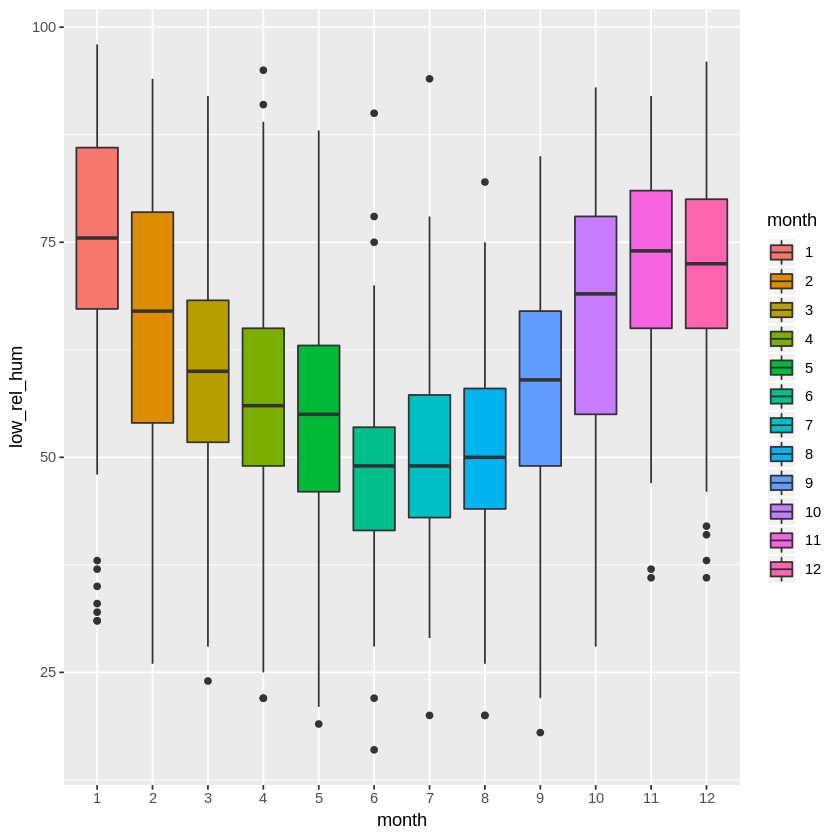

In [38]:

vic_bike_weather %>% dplyr::mutate(month = factor(month)) %>% 
ggplot(aes(x = month,  y = low_rel_hum, group = month)) + geom_boxplot( aes(fill=month))

Warning message:
“Removed 52 rows containing non-finite values (stat_boxplot).”

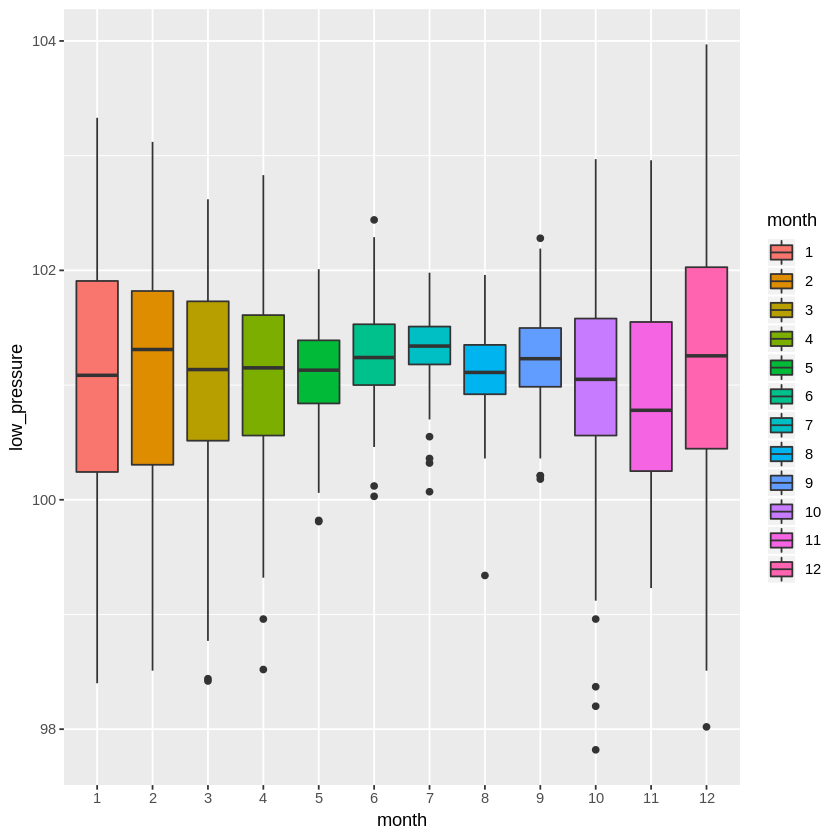

In [40]:
vic_bike_weather %>% dplyr::mutate(month = factor(month)) %>% 
ggplot(aes(x = month,  y = low_pressure, group = month)) + geom_boxplot( aes(fill=month))

Warning message:
“Removed 52 rows containing non-finite values (stat_boxplot).”

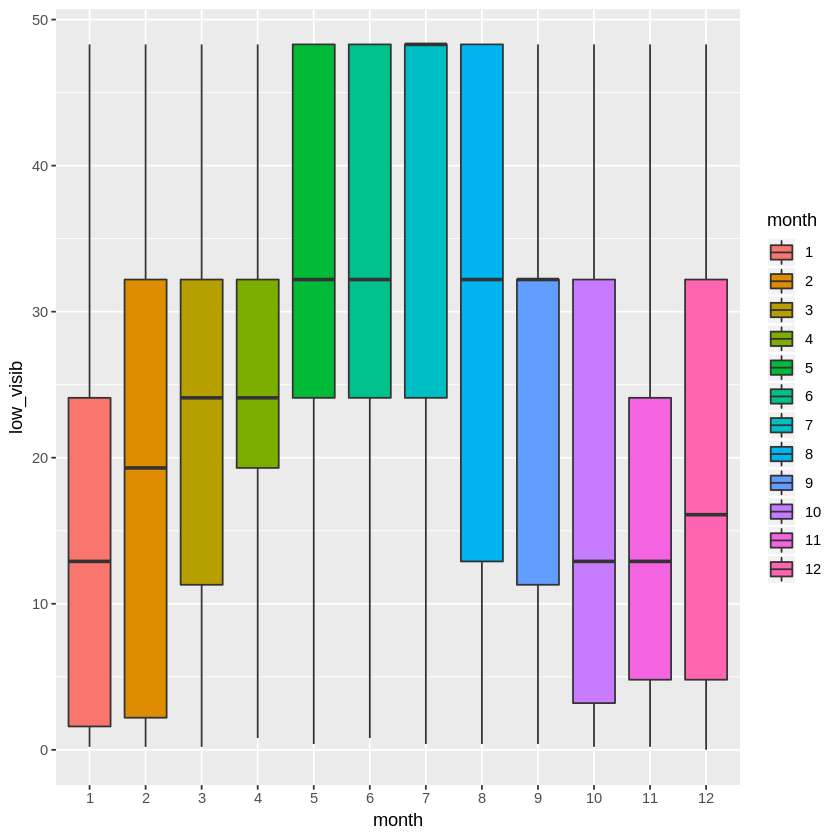

In [51]:
vic_bike_weather %>% dplyr::mutate(month = factor(month)) %>% 
ggplot(aes(x = month,  y = low_visib, group = month)) + geom_boxplot( aes(fill=month))

In [41]:
vic_bike_weather_long = vic_bike_weather %>% 
            tidyr::gather(variable, value, bikes_count,hi_temp,low_temp,hi_visib,low_visib,hi_wind_spd,low_wind_spd,hi_rel_hum,low_rel_hum,hi_pressure,low_pressure )

In [42]:
vic_bike_weather_long %>% glimpse()

Observations: 18,546
Variables: 25
$ date      <date> 2014-12-18, 2014-12-19, 2014-12-20, 2014-12-21, 2014-12-22…
$ Jan       <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,…
$ Feb       <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ Mar       <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ Apr       <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ May       <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ Jun       <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ Jul       <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ Aug       <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ Sep       <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ Oct       <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ Nov       <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ Dec       <int>

Warning message:
“Removed 540 rows containing non-finite values (stat_boxplot).”

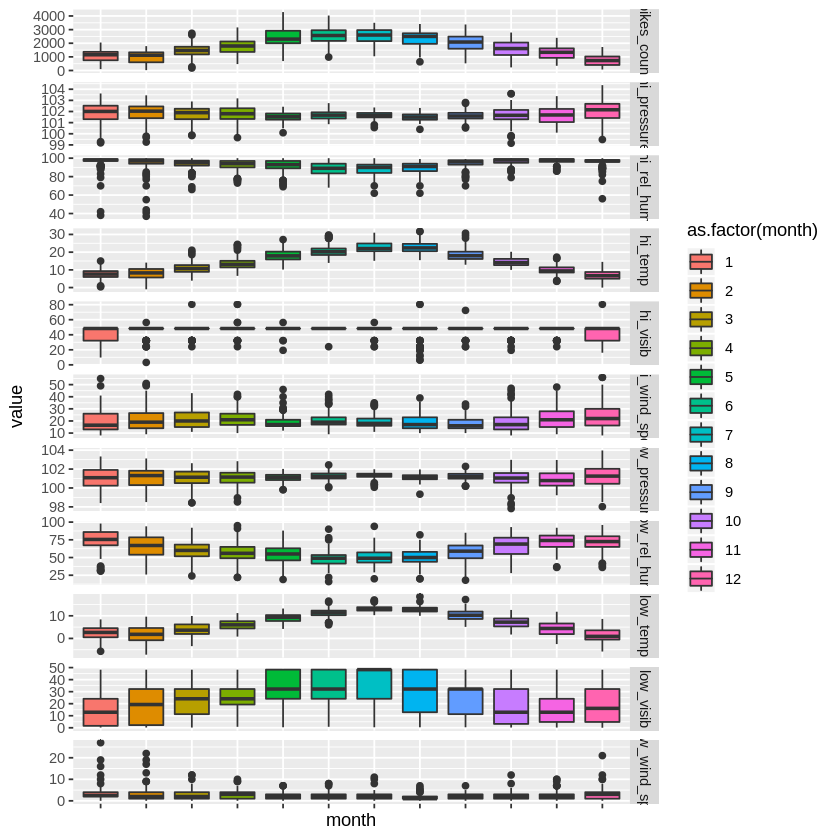

In [48]:
vic_bike_weather_long %>% filter(variable %in% c())
ggplot(vic_bike_weather_long, aes(x=as.factor(month), y=value, fill=as.factor(month)))+
  geom_boxplot()+
  facet_grid(variable~., scales="free")+
  labs(x="month")+
  theme(axis.text.x=element_blank())

Warning message:
“Removed 280 rows containing non-finite values (stat_boxplot).”

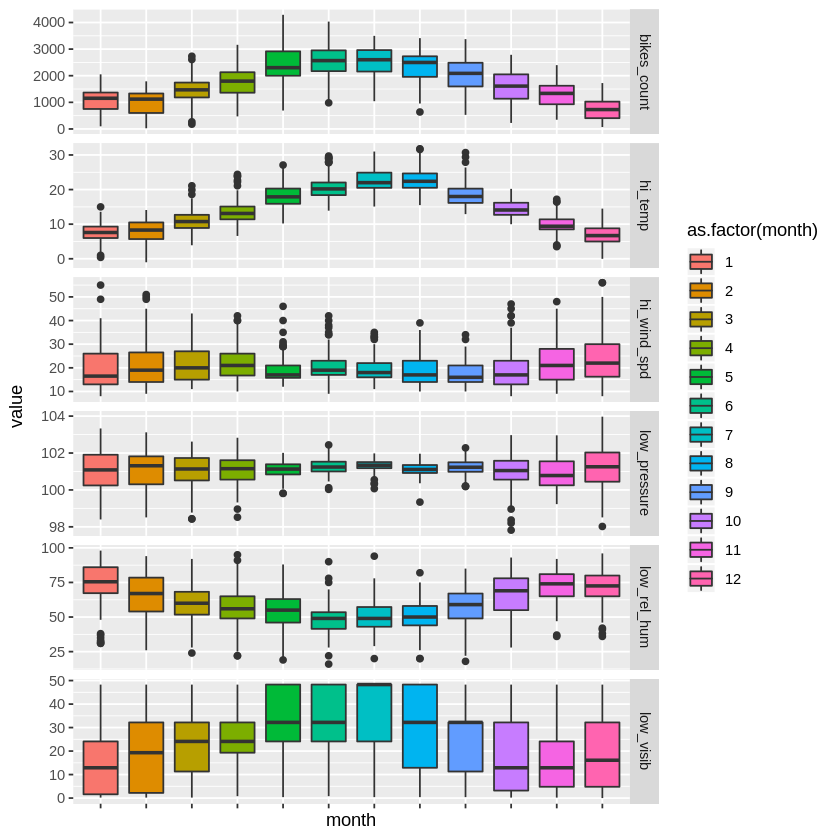

In [50]:
vic_bike_weather_long %>% dplyr::filter(variable %in% c("bikes_count",'hi_temp',
                                   'low_visib','hi_wind_spd',
                                   'low_rel_hum','low_pressure')) %>% 
ggplot(aes(x=as.factor(month), y=value, fill=as.factor(month)))+
  geom_boxplot()+
  facet_grid(variable~., scales="free")+
  labs(x="month")+
  theme(axis.text.x=element_blank())

Warning message:
“Removed 280 rows containing non-finite values (stat_boxplot).”

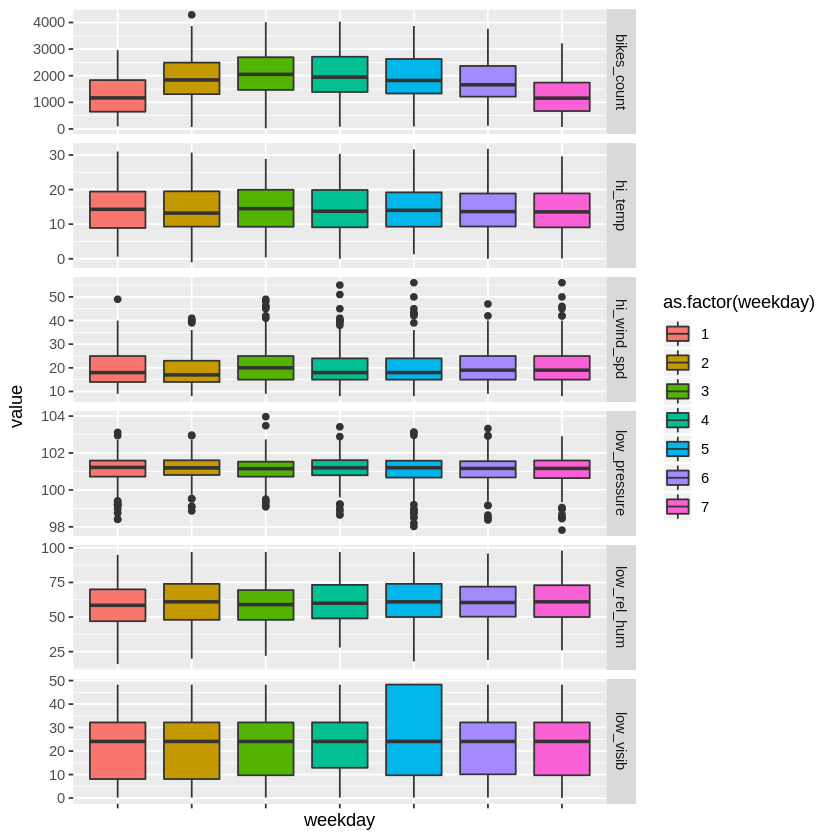

In [53]:
vic_bike_weather_long %>% dplyr::filter(variable %in% c("bikes_count",'hi_temp',
                                   'low_visib','hi_wind_spd',
                                   'low_rel_hum','low_pressure')) %>% 
ggplot(aes(x=as.factor(weekday), y=value, fill=as.factor(weekday)))+
  geom_boxplot()+
  facet_grid(variable~., scales="free")+
  labs(x="weekday")+
  theme(axis.text.x=element_blank())

# Regressin with highly correlated variables

In [ ]:
# bikes_count,hi_temp,low_temp,hi_visib,low_visib,hi_wind_spd,low_wind_spd,hi_rel_hum,low_rel_hum,hi_pressure,low_pressure

In [16]:
paste(names(vic_bike_weather),collapse = '+')

[1] "date+bikes_count+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec+weekend+trend+trend_sq+trend_cub+weekday+yearday+month+quarter+year+hi_temp+low_temp+hi_visib+low_visib+hi_wind_spd+low_wind_spd+hi_rel_hum+low_rel_hum+hi_pressure+low_pressure+weather"

## Convert the month, quarter, weekday to factors, and then R will convert them to categorical and binary dummy variables in the regression


'date+bikes_count+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec+weekend+trend+trend_sq+trend_cub+weekday+yearday+month+quarter+year+hi_temp+low_temp+hi_visib+low_visib+hi_wind_spd+low_wind_spd+hi_rel_hum+low_rel_hum+hi_pressure+low_pressure+weather'




In [30]:
vic_bike_weather = vic_bike_weather %>% dplyr::mutate(month = factor(month),
                                     quarter = factor(quarter),
                                     weekday = factor(weekday),
                                     year = factor(year),
                                     weather = factor(weather))  

In [31]:
model_1 = lm( formula = bikes_count~Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec+
             weekend+
             trend+trend_sq+trend_cub+
             weekday+yearday+quarter+year+
             hi_temp+low_temp+
             hi_visib+low_visib+
             hi_wind_spd+low_wind_spd+
             hi_rel_hum+low_rel_hum+
             hi_pressure+
             low_pressure+
             weather, 
             data = vic_bike_weather)

In [19]:
summary(model_1)


Call:
lm(formula = bikes_count ~ Feb + Mar + Apr + May + Jun + Jul + 
    Aug + Sep + Oct + Nov + Dec + weekend + trend + trend_sq + 
    trend_cub + weekday + yearday + quarter + year + hi_temp + 
    low_temp + hi_visib + low_visib + hi_wind_spd + low_wind_spd + 
    hi_rel_hum + low_rel_hum + hi_pressure + low_pressure + weather, 
    data = vic_bike_weather)

Residuals:
     Min       1Q   Median       3Q      Max 
-1661.11  -141.34    21.38   169.49  1265.15 

Coefficients: (4 not defined because of singularities)
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -3.566e+04  1.874e+04  -1.903 0.057234 .  
Feb                      -9.330e+01  4.292e+01  -2.174 0.029874 *  
Mar                       1.290e+02  6.057e+01   2.129 0.033412 *  
Apr                       2.891e+02  8.261e+01   3.499 0.000479 ***
May                       5.432e+02  1.066e+02   5.094 3.92e-07 ***
Jun                       5.146e+02  1.314e+02   3.916 9.39e-05 **

# Model selection 

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4842399/

## Stepwise selection

In [20]:
step = stepAIC(model_1, trace = FALSE)

In [21]:
step$anova

Step          Df Deviance     Resid. Df Resid. Dev AIC     
1               NA           NA 1581      130162663  18509.66
2 - quarter      0 0.000000e+00 1581      130162663  18509.66
3 - weekend      0 5.960464e-08 1581      130162663  18509.66
4 - Nov          1 4.280333e+01 1582      130162706  18507.66
5 - hi_rel_hum   1 1.652166e+03 1583      130164358  18505.68
6 - low_temp     1 4.146547e+04 1584      130205824  18504.20
7 - hi_pressure  1 1.296635e+05 1585      130335487  18503.83

In [22]:
step$anova$Step

[1]               - quarter     - weekend     - Nov         - hi_rel_hum 
[6] - low_temp    - hi_pressure
Levels:  - hi_pressure - hi_rel_hum - low_temp - Nov - quarter - weekend

# Final model

In [24]:
step$call

lm(formula = bikes_count ~ Feb + Mar + Apr + May + Jun + Jul + 
    Aug + Sep + Oct + Dec + trend + trend_sq + trend_cub + weekday + 
    yearday + year + hi_temp + hi_visib + low_visib + hi_wind_spd + 
    low_wind_spd + low_rel_hum + low_pressure + weather, data = vic_bike_weather)

In [34]:
step_final_model = lm(formula = bikes_count ~ Feb + Mar + Apr + May + Jun + Jul + 
    Aug + Sep + Oct + Dec + trend + trend_sq + trend_cub + weekday + 
     year + hi_temp + hi_visib + low_visib + hi_wind_spd + 
    low_wind_spd + low_rel_hum + low_pressure + weather, data = vic_bike_weather)

In [35]:
jtools::summ(step_final_model)

MODEL INFO:
Observations: 1631 (55 missing obs. deleted)
Dependent Variable: bikes_count
Type: OLS linear regression 

MODEL FIT:
F(44,1586) = 270.55, p = 0.00
R² = 0.88
Adj. R² = 0.88 

Standard errors: OLS
-------------------------------------------------------------------
                                     Est.      S.E.   t val.      p
------------------------------ ---------- --------- -------- ------
(Intercept)                      -2699.00   1152.14    -2.34   0.02
Feb                                -92.91     33.70    -2.76   0.01
Mar                                145.40     32.34     4.50   0.00
Apr                                304.09     34.02     8.94   0.00
May                                560.35     38.49    14.56   0.00
Jun                                527.51     42.70    12.35   0.00
Jul                                480.84     46.16    10.42   0.00
Aug                                310.74     47.16     6.59   0.00
Sep                                210.18   

In [35]:
tidy(step_final_model)

term                     estimate      std.error    statistic  
1  (Intercept)              -3.872904e+04 1.858560e+04  -2.0838194
2  Feb                      -9.232530e+01 3.367402e+01  -2.7417366
3  Mar                       1.297017e+02 3.330924e+01   3.8938660
4  Apr                       2.894071e+02 3.482568e+01   8.3101624
5  May                       5.483131e+02 3.894919e+01  14.0776503
6  Jun                       5.161200e+02 4.306365e+01  11.9850487
7  Jul                       4.692394e+02 4.650300e+01  10.0905201
8  Aug                       3.002219e+02 4.742847e+01   6.3299941
9  Sep                       2.022924e+02 4.109665e+01   4.9223584
10 Oct                       5.536411e+01 3.732187e+01   1.4834228
11 Dec                      -2.683182e+02 4.063339e+01  -6.6033918
12 trend                    -1.011263e+02 5.233132e+01  -1.9324241
13 trend_sq                 -8.086246e-04 3.683734e-04  -2.1951221
14 trend_cub                 4.826617e-07 1.511535e-07   3.1931883
15 weekday2                  6.392239e+02 2.728506e+01  23.4276115
16 weekday3                  8.146123e+02 2.691271e+01  30.2686811
17 weekday4                  7.923002e+02 2.691651e+01  29.4354755
18 weekday5                  6.925459e+02 2.676847e+01  25.8717021
19 weekday6                  5.002131e+02 2.675436e+01  18.6965067
20 weekday7                 -1.206111e+01 2.687861e+01  -0.4487252
21 yearday                   1.016761e+02 5.234754e+01   1.9423287
22 year2015                  3.717258e+04 1.910977e+04   1.9452138
23 year2016                  7.431296e+04 3.821927e+04   1.9443843
24 year2017                  1.115296e+05 5.739039e+04   1.9433503
25 year2018                  1.485799e+05 7.647410e+04   1.9428786
26 year2019                  1.854510e+05 9.559729e+04   1.9399192
27 hi_temp                   5.210814e+01 2.771864e+00  18.7989518
28 hi_visib                  5.899421e+00 1.234301e+00   4.7795650
29 low_visib                 3.830389e+00 7.189996e-01   5.3273863
30 hi_wind_spd              -5.415922e+00 1.167002e+00  -4.6408836
31 low_wind_spd             -1.114203e+01 3.777707e+00  -2.9494158
32 low_rel_hum               2.140261e+00 7.708119e-01   2.7766325
33 low_pressure              2.774408e+01 1.125565e+01   2.4649030
34 weatherCloudy            -2.098430e+02 3.448675e+01  -6.0847414
35 weatherDrizzle,Fog       -1.652789e+02 1.717255e+02  -0.9624601
36 weatherFog               -5.607075e+01 4.804955e+01  -1.1669361
37 weatherMainly Clear       2.350761e+01 2.552971e+01   0.9207942
38 weatherModerate Rain     -2.013340e+02 2.921348e+02  -0.6891818
39 weatherModerate Rain,Fog -5.432050e+02 2.085354e+02  -2.6048574
40 weatherModerate Snow     -2.347480e+02 2.924951e+02  -0.8025708
41 weatherMostly Cloudy     -1.199274e+02 2.443198e+01  -4.9086233
42 weatherRain              -3.388212e+02 3.345623e+01 -10.1272987
43 weatherRain Showers      -2.663718e+02 8.352464e+01  -3.1891399
44 weatherRain,Fog          -3.757026e+02 5.280654e+01  -7.1146984
45 weatherSmoke             -1.484244e+02 1.297362e+02  -1.1440474
46 weatherSnow              -5.298711e+02 8.158576e+01  -6.4946518
   p.value      
1   3.733645e-02
2   6.180235e-03
3   1.027563e-04
4   2.027799e-16
5   1.689378e-42
6   9.575353e-32
7   3.011755e-23
8   3.184140e-10
9   9.441841e-07
10  1.381609e-01
11  5.467773e-11
12  5.348518e-02
13  2.829941e-02
14  1.434747e-03
15 1.804084e-104
16 3.243329e-159
17 2.710337e-152
18 2.086619e-123
19  1.199681e-70
20  6.536912e-01
21  5.227425e-02
22  5.192588e-02
23  5.202584e-02
24  5.215067e-02
25  5.220770e-02
26  5.256670e-02
27  2.479820e-71
28  1.919440e-06
29  1.139577e-07
30  3.754954e-06
31  3.230418e-03
32  5.557154e-03
33  1.381040e-02
34  1.460207e-09
35  3.359654e-01
36  2.434117e-01
37  3.572980e-01
38  4.908098e-01
39  9.277222e-03
40  4.223431e-01
41  1.011693e-06
42  2.116789e-23
43  1.454862e-03
44  1.692252e-12
45  2.527767e-01
46  1.110859e-10

# Diagnostics

http://www.sthda.com/english/articles/39-regression-model-diagnostics/161-linear-regression-assumptions-and-diagnostics-in-r-essentials/

In [37]:
model.diag.metrics <- broom::augment(model_1)
head(model.diag.metrics)

.rownames bikes_count Feb Mar Apr May Jun Jul Aug Sep ⋯ hi_pressure
1 1         570         0   0   0   0   0   0   0   0   ⋯ 101.09     
2 2         873         0   0   0   0   0   0   0   0   ⋯ 101.01     
3 3         258         0   0   0   0   0   0   0   0   ⋯ 100.61     
4 4         460         0   0   0   0   0   0   0   0   ⋯ 101.60     
5 5         943         0   0   0   0   0   0   0   0   ⋯ 102.64     
6 6         556         0   0   0   0   0   0   0   0   ⋯ 102.42     
  low_pressure weather       .fitted   .se.fit  .resid    .hat       .sigma  
1 100.10       Rain          613.19420 81.70289 -43.19420 0.08108121 287.0194
2 100.28       Mostly Cloudy 751.90277 82.01943 121.09723 0.08171071 287.0041
3  98.99       Rain          -34.45254 84.92606 292.45254 0.08760471 286.9183
4  99.62       Mostly Cloudy 190.50725 86.59438 269.49275 0.09108039 286.9335
5 101.67       Cloudy        796.57525 83.21561 146.42475 0.08411144 286.9958
6 101.38       Rain,Fog      601.62738 87.98654 -45.62738 0.09403249 287.0191
  .cooksd      .std.resid
1 4.352034e-05 -0.1570397
2 3.451944e-04  0.4404201
3 2.186491e-03  1.0670545
4 1.945107e-03  0.9851607
5 5.222449e-04  0.5332316
6 5.794008e-05 -0.1670675

In [ ]:
model.diag.metrics$.resid

In [62]:
lmtest::bptest(model_1)


	studentized Breusch-Pagan test

data:  model_1
BP = 149.17, df = 49, p-value = 4.746e-12


In [63]:
lmtest::bqtest(model_1)

ERROR: Error: 'bqtest' is not an exported object from 'namespace:lmtest'


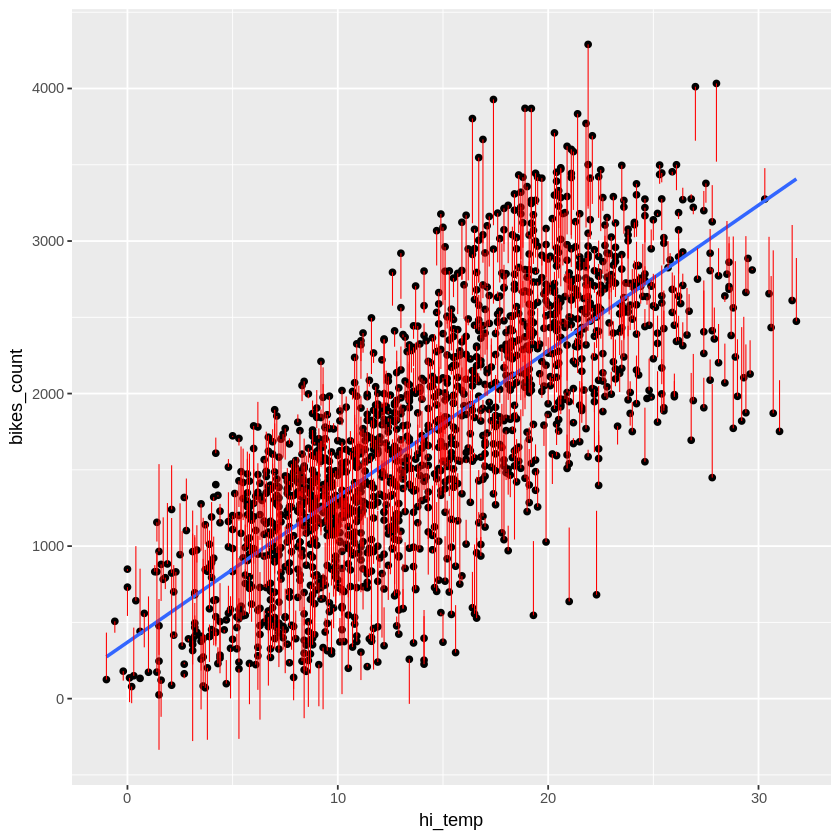

In [38]:
ggplot(model.diag.metrics, aes( hi_temp,bikes_count)) +
  geom_point() +
  stat_smooth(method = lm, se = FALSE) +
  geom_segment(aes(xend = hi_temp, yend = .fitted), color = "red", size = 0.3)

Warning message:
“not plotting observations with leverage one:
  694, 1482”Warning message:
“not plotting observations with leverage one:
  694, 1482”

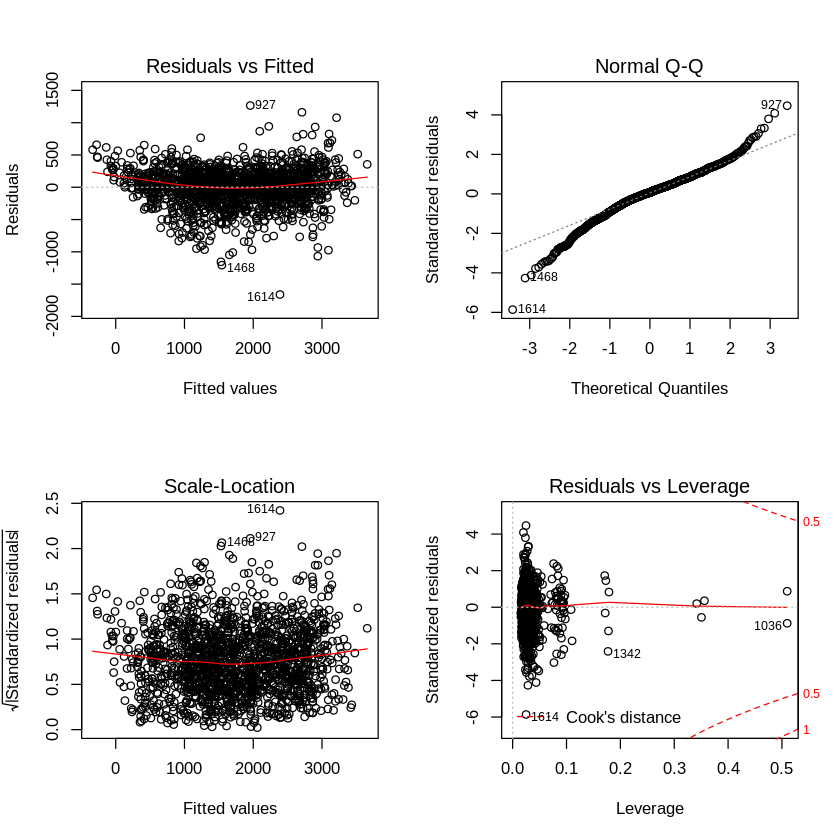

In [39]:
par(mfrow = c(2, 2))
plot(model_1)




The diagnostic plots show residuals in four different ways:

    Residuals vs Fitted. Used to check the linear relationship assumptions. A horizontal line, without distinct patterns is an indication for a linear relationship, what is good.

    Normal Q-Q. Used to examine whether the residuals are normally distributed. It’s good if residuals points follow the straight dashed line.

    Scale-Location (or Spread-Location). Used to check the homogeneity of variance of the residuals (homoscedasticity). Horizontal line with equally spread points is a good indication of homoscedasticity. This is not the case in our example, where we have a heteroscedasticity problem.

    Residuals vs Leverage. Used to identify influential cases, that is extreme values that might influence the regression results when included or excluded from the analysis. This plot will be described further in the next sections.

The four plots show the top 3 most extreme data points labeled with with the row numbers of the data in the data set. They might be potentially problematic. You might want to take a close look at them individually to check if there is anything special for the subject or if it could be simply data entry errors. We’ll discuss about this in the following sections.

The metrics used to create the above plots are available in the model.diag.metrics data, described in the previous section.


## 1 Linearity of the data

### The linearity assumption can be checked by inspecting the Residuals vs Fitted plot (1st plot):

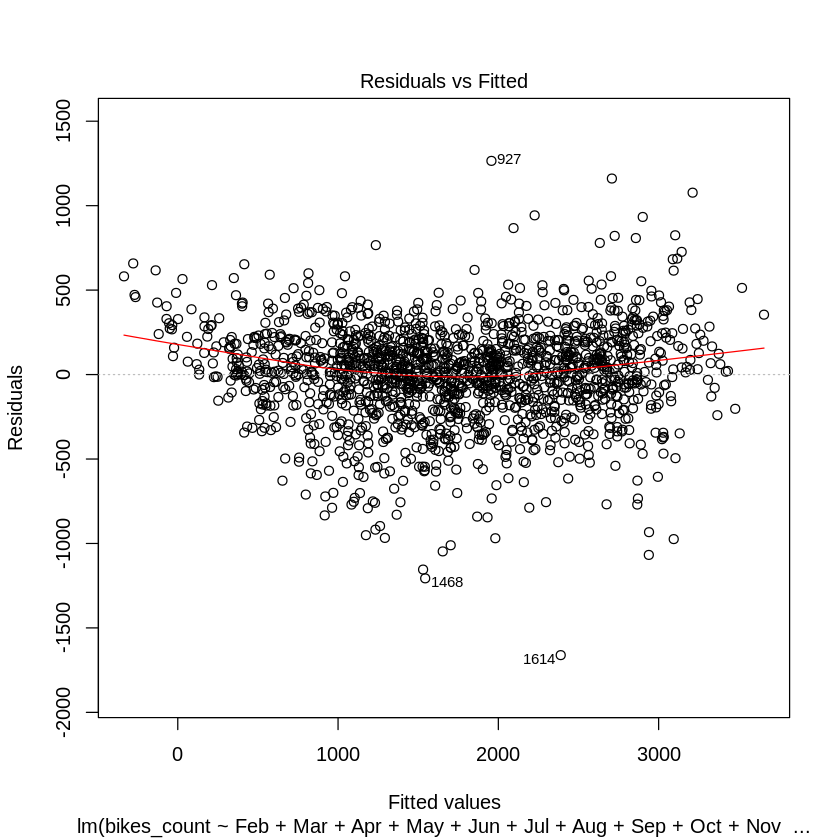

In [41]:


plot(model_1, 1)

Ideally, the residual plot will show no fitted pattern. That is, the red line should be approximately horizontal at zero. The presence of a pattern may indicate a problem with some aspect of the linear model.

It seems to be a little nonlinearity.



## 2 Homogeneity of variance

This assumption can be checked by examining the scale-location plot, also known as the spread-location plot.


Warning message:
“not plotting observations with leverage one:
  694, 1482”

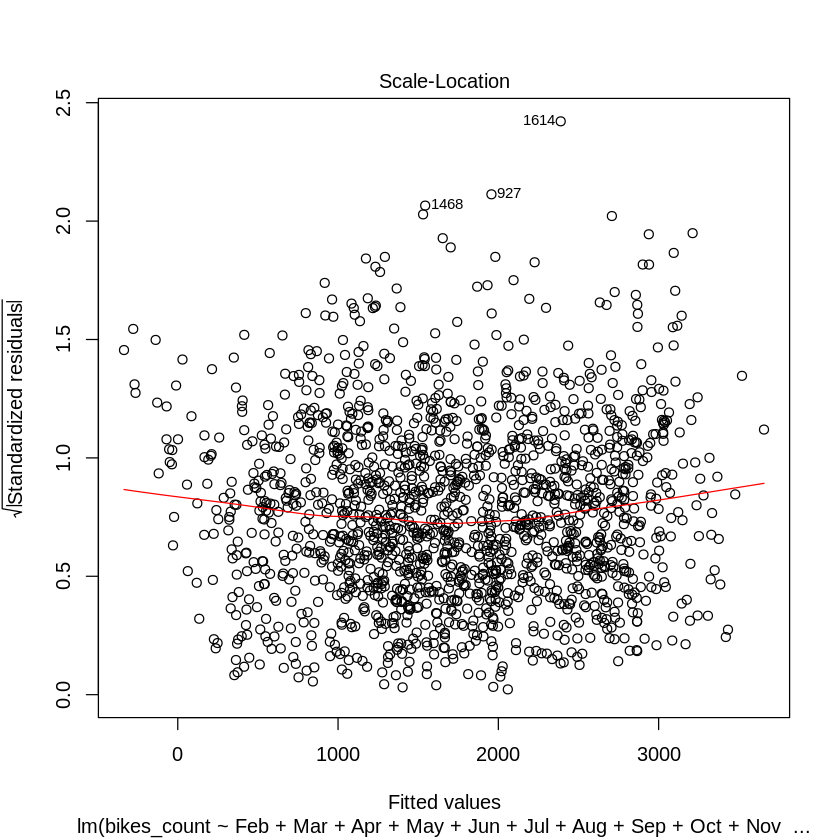

In [42]:

plot(model_1, 3)

This plot shows if residuals are spread equally along the ranges of predictors. It’s good if you see a horizontal line with equally spread points. 

It can be seen that the variability (variances) of the residual points increases with the value of the fitted outcome variable, suggesting non-constant variances in the residuals errors (or heteroscedasticity).

A possible solution to reduce the heteroscedasticity problem is to use a log or square root transformation of the outcome variable (y).


## 3 Normality of residuals

The QQ plot of residuals can be used to visually check the normality assumption. The normal probability plot of residuals should approximately follow a straight line.

In our example, all the points fall approximately along this reference line, so we can assume normality.

Warning message:
“not plotting observations with leverage one:
  694, 1482”

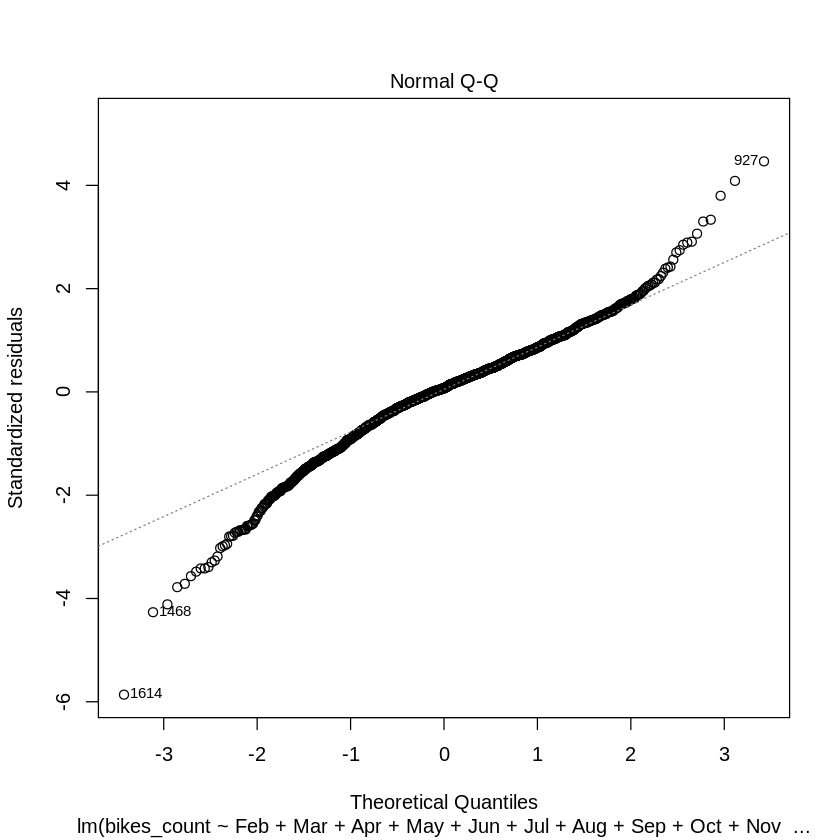

In [43]:


plot(model_1, 2)




### 4 Outliers and high levarage points

Outliers:

An outlier is a point that has an extreme outcome variable value. The presence of outliers may affect the interpretation of the model, because it increases the RSE.

Outliers can be identified by examining the standardized residual (or studentized residual), which is the residual divided by its estimated standard error. Standardized residuals can be interpreted as the number of standard errors away from the regression line.

Observations whose standardized residuals are greater than 3 in absolute value are possible outliers (James et al. 2014).

High leverage points:

A data point has high leverage, if it has extreme predictor x values. This can be detected by examining the leverage statistic or the hat-value. A value of this statistic above 2(p + 1)/n indicates an observation with high leverage (P. Bruce and Bruce 2017); where, p is the number of predictors and n is the number of observations.

Outliers and high leverage points can be identified by inspecting the Residuals vs Leverage plot:



Warning message:
“not plotting observations with leverage one:
  694, 1482”

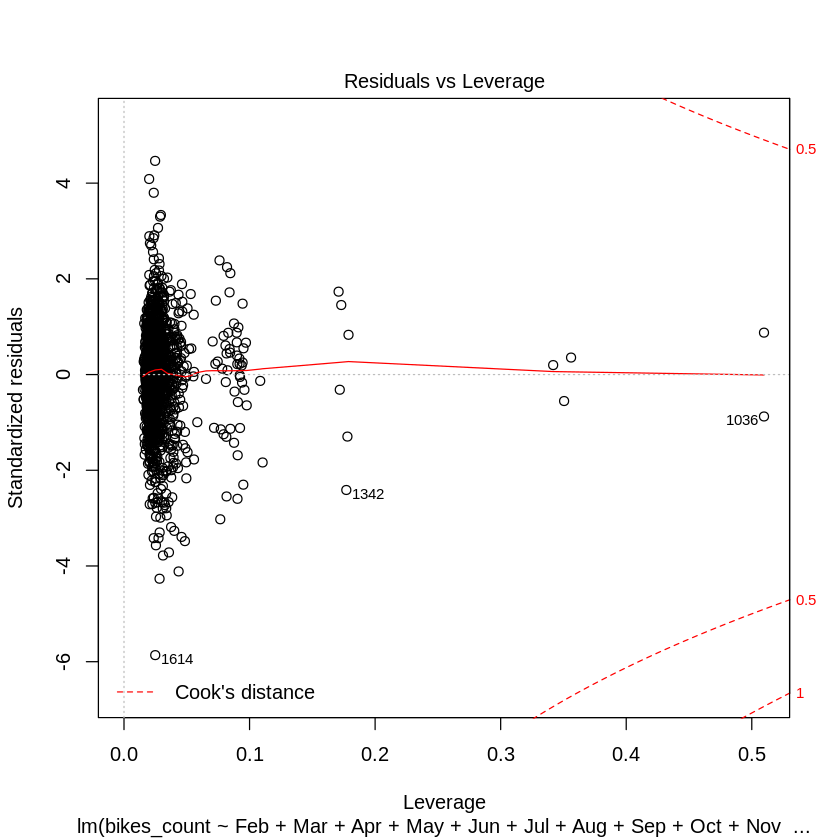

In [44]:
plot(model_1, 5)

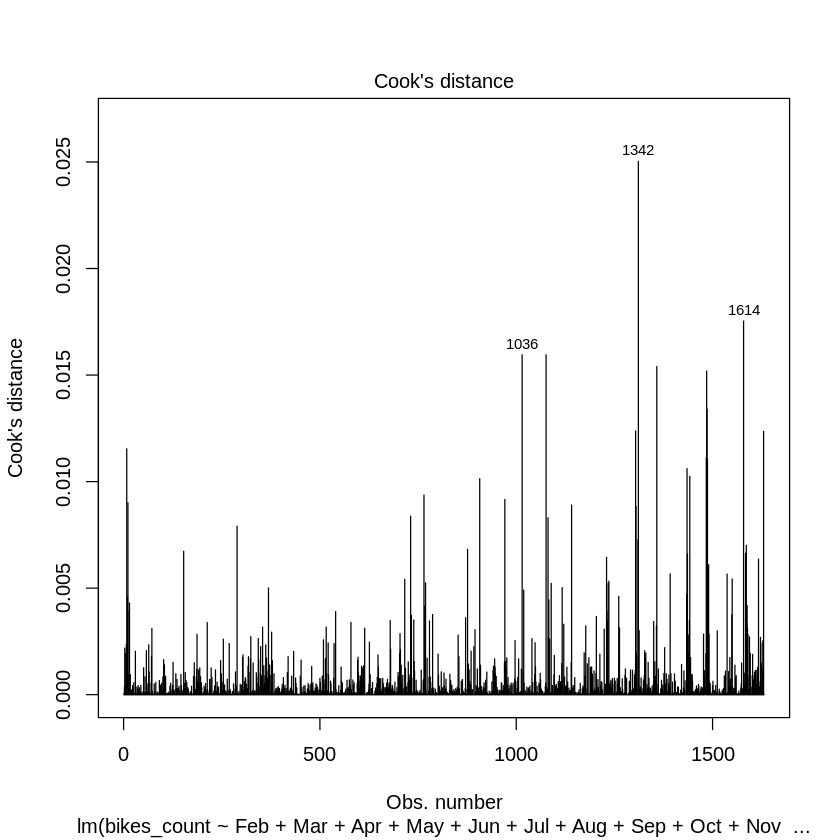

In [47]:
# Cook's distance
plot(model_1, 4)

By default, the top 3 most extreme values are labelled on the Cook’s distance plot. If you want to label the top 5 extreme values, specify the option id.n as follow:

Warning message:
“not plotting observations with leverage one:
  694, 1482”

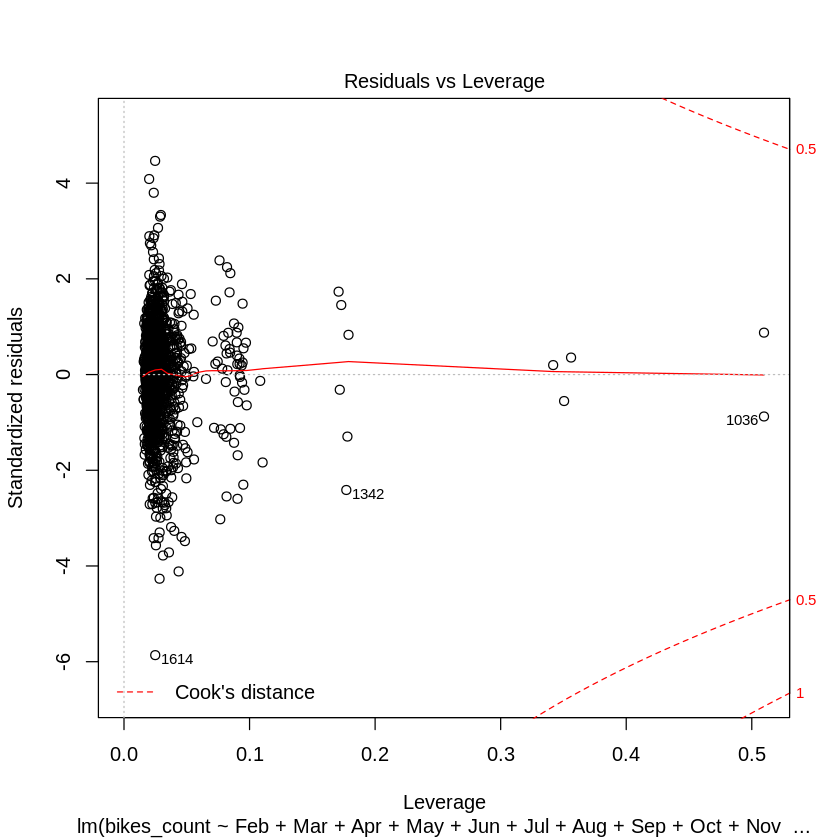

In [48]:

# Residuals vs Leverage
plot(model_1, 5)

BG test for serial correlation


Additional Diagnostic Help

The gvlma( ) function in the gvlma package, performs a global validation of linear model assumptions as well separate evaluations of skewness, kurtosis, and heteroscedasticity.

# Global test of model assumptions


In [52]:
pacman::p_load(gvlma,ggfortify)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)

ggfortify installed


In [55]:

# library(gvlma)
# gvmodel <- gvlma(model_1)
# summary(gvmodel) 

Warning message:
“Removed 536 rows containing missing values (geom_path).”Warning message:
“Removed 2 rows containing missing values (geom_point).”Warning message:
“Removed 2 rows containing missing values (geom_path).”

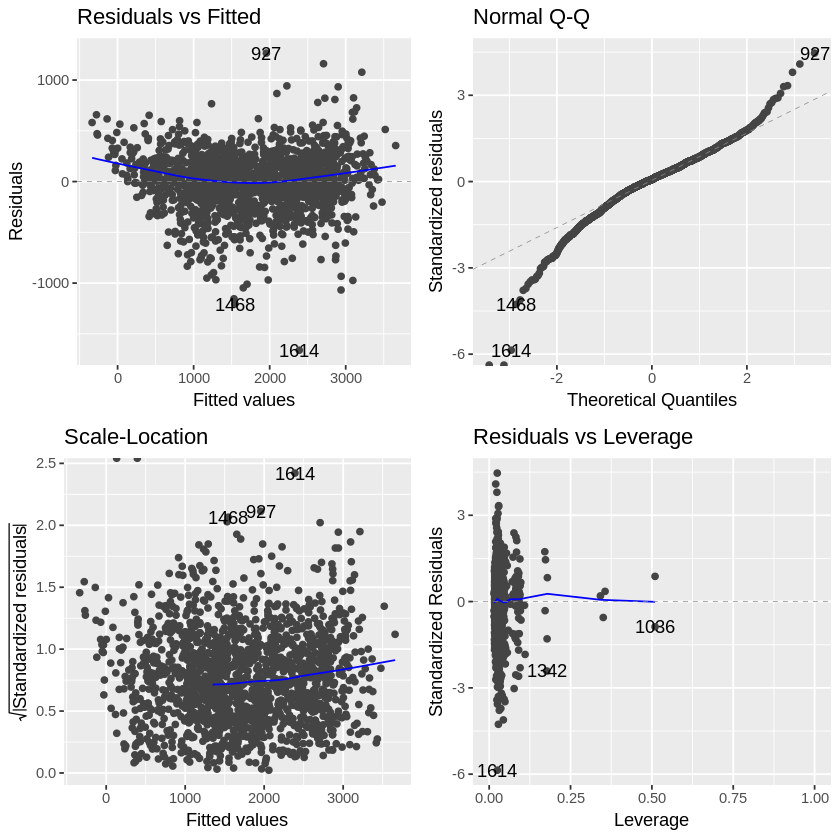

In [53]:
library(ggfortify)
autoplot(model_1)

In [ ]:
step_final_model = lm(formula = bikes_count ~ Feb + Mar + Apr + May + Jun + Jul + 
    Aug + Sep + Oct + Dec + trend + trend_sq + trend_cub + weekday + 
     year + hi_temp + hi_visib + low_visib + hi_wind_spd + 
    low_wind_spd + low_rel_hum + low_pressure + weather, data = vic_bike_weather)

In [59]:
train_data = vic_bike_weather[1:(nrow(vic_bike_weather)-20),]

In [60]:
test_data = vic_bike_weather[(nrow(vic_bike_weather)-19):nrow(vic_bike_weather),]

In [ ]:
test_data

# Time series ARIMA ADL approach

In [ ]:
RMSE = mean((observeds - predicteds)^2) %>% sqrt()

# Best subset regression


Xy is a data frame containing independent variables and response variable. For logistic regression model when family is set to be binomial, the last column is the response variable. The sequence of Xy is important because a formula to specify response and independent variables are not allowed with bestglm() function. We can move the response variable low to the last column and assign a new name to the new data frame. The IC argument specifies the information criteria to use. Its values can be “AIC”, “BIC”, “BICg”, “BICq”, “LOOCV” and “CV”

Furthermore, factors with more than two levels should be converted to dummy variables. Otherwise, it returns an error message.

https://stackoverflow.com/questions/49276914/mutating-dummy-variables-in-dplyr?rq=1

To create dummy variables for factors with more than two levels, we use the dummies package. The dummy() function passes a single variable and returns a matrix with the number of rows equal to that of given variable, and the number of columns equal to the number of levels of that variable. Because only n-1 dummy variables are needed to define a factor with n levels, I remove the base level by simple manipulation of vectors. Finally, a new data frame containing dummy variables is created, with the response variable in the last column.


In [40]:
library(sjmisc)

vic_bike_weather_subset_simple= vic_bike_weather %>% 
    dplyr::select(weekday, quarter, year,weather) %>%
      sjmisc::to_dummy(suffix = "label") %>% 
      bind_cols(vic_bike_weather) 

In [41]:
vic_bike_weather_subset_simple %>% glimpse()

Observations: 1,686
Variables: 65
$ weekday_1                   <dbl> 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,…
$ weekday_2                   <dbl> 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,…
$ weekday_3                   <dbl> 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,…
$ weekday_4                   <dbl> 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,…
$ weekday_5                   <dbl> 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,…
$ weekday_6                   <dbl> 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,…
$ weekday_7                   <dbl> 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,…
$ quarter_1                   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ quarter_2                   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ quarter_3                   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ quarter_4                   <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ year_2014                   <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ year_2015       

In [32]:
library(sjmisc)

vic_bike_weather_subset= vic_bike_weather %>% 
  sjmisc::to_dummy(weekday, suffix = "label") %>% 
  bind_cols(vic_bike_weather) 

vic_bike_weather_subset= vic_bike_weather_subset%>% 
    sjmisc::to_dummy(quarter, suffix = "label") %>% 
      bind_cols(vic_bike_weather_subset) 

vic_bike_weather_subset= vic_bike_weather_subset%>%  
    sjmisc::to_dummy(year, suffix = "label") %>% 
      bind_cols(vic_bike_weather_subset)

vic_bike_weather_subset= vic_bike_weather_subset%>%  
    sjmisc::to_dummy(weather, suffix = "label") %>% 
      bind_cols(vic_bike_weather_subset) 


#   select(x, day, everything())

In [63]:
vic_bike_weather_subset_lm = vic_bike_weather_subset %>% dplyr::select(-date, -weekday ,-month,-quarter,-year,-weather,-yearday) %>% 
dplyr::select( bikes_count,everything())
# %>% glimpse()



In [64]:
vic_bike_weather_subset_lm_order= bind_cols(vic_bike_weather_subset_lm %>% dplyr::select(-bikes_count), 
                                        vic_bike_weather_subset_lm %>% dplyr::select(bikes_count))
# %>% 
#             bind_cols(vic_bike_weather_subset_lm[,1]) 

In [65]:
vic_bike_weather_subset_lm_order %>% glimpse()

Observations: 1,686
Variables: 58
$ weather_Clear               <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,…
$ weather_Cloudy              <dbl> 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,…
$ `weather_Drizzle,Fog`       <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ weather_Fog                 <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ `weather_Mainly Clear`      <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,…
$ `weather_Moderate Rain`     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ `weather_Moderate Rain,Fog` <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ `weather_Moderate Snow`     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ `weather_Mostly Cloudy`     <dbl> 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,…
$ weather_Rain                <dbl> 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,…
$ `weather_Rain Showers`      <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ `weather_Rain,Fog`          <dbl> 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,…
$ weather_Smoke   

In [67]:
vic_bike_weather_subset_lm_order = na.omit(vic_bike_weather_subset_lm_order)

## Not working

In [ ]:
# bestglm(vic_bike_weather_subset_lm_order, IC = 'BIC', family = gaussian)

Warning message in leaps.setup(x, y, wt = weights, nbest = nbest, nvmax = nvmax, :
“9  linear dependencies found”

Warning message:
“Removed 20 rows containing missing values (geom_path).”Warning message:
“Removed 20 rows containing missing values (geom_path).”

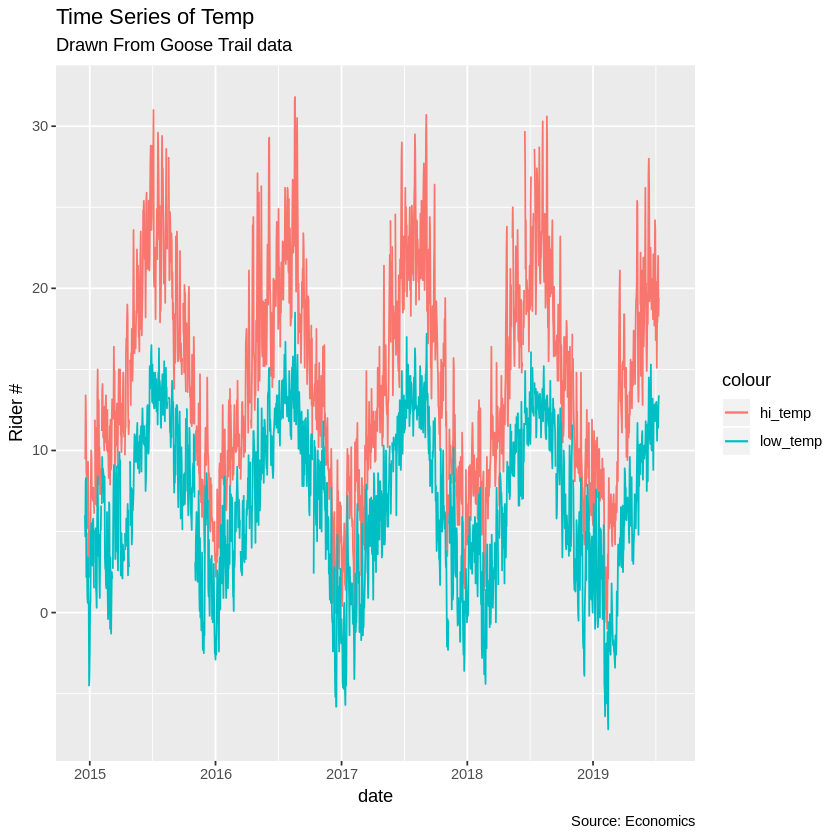

In [170]:
# plot
ggplot(vic_bike_weather, aes(x=date)) + 
  geom_line(aes(y=hi_temp, col="hi_temp")) + 
  geom_line(aes(y=low_temp, col="low_temp")) + 
  labs(title="Time Series of Temp", 
       subtitle="Drawn From Goose Trail data", 
       caption="Source: Economics", y="Rider #") #+  # title and caption
#   scale_x_date(labels = lbls, breaks = brks) +  # change to monthly ticks and labels
#   scale_color_manual(name="", 
#                      values = c("psavert"="#00ba38", "uempmed"="#f8766d")) #+  # line color
#   theme(panel.grid.minor = element_blank())  # turn off minor grid

Warning message:
“Removed 20 rows containing missing values (geom_path).”

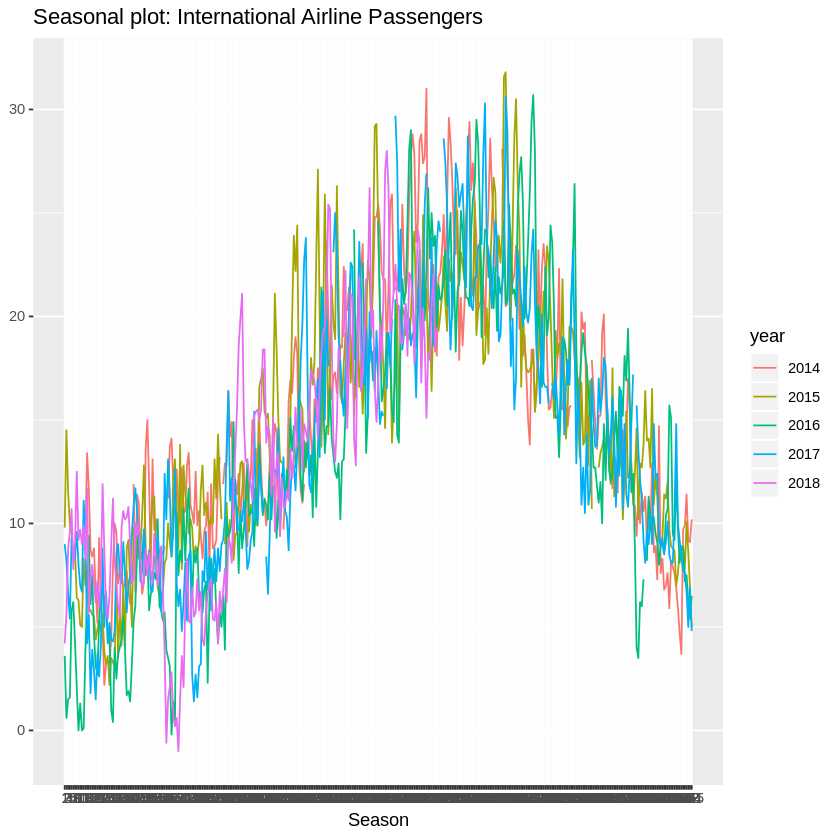

In [177]:
ggseasonplot(vic_bike_weather_ts[,'hi_temp']) + labs(title="Seasonal plot: International Airline Passengers")

In [164]:
head(vic_bike_weather)

date       bikes_count Jan Feb Mar Apr May Jun Jul Aug ⋯ low_temp hi_visib
1 2014-12-18 570         0   0   0   0   0   0   0   0   ⋯ 6.0      48.3    
2 2014-12-19 873         0   0   0   0   0   0   0   0   ⋯ 4.7      48.3    
3 2014-12-20 258         0   0   0   0   0   0   0   0   ⋯ 8.1      48.3    
4 2014-12-21 460         0   0   0   0   0   0   0   0   ⋯ 8.3      48.3    
5 2014-12-22 943         0   0   0   0   0   0   0   0   ⋯ 2.2      48.3    
6 2014-12-23 556         0   0   0   0   0   0   0   0   ⋯ 4.9      32.2    
  low_visib hi_wind_spd low_wind_spd hi_rel_hum low_rel_hum hi_pressure
1  2.4      31          1            99         78          101.09     
2 24.1      24          1            98         72          101.01     
3  4.8      40          6            98         73          100.61     
4 24.1      34          5            82         61          101.60     
5 19.3      18          2            96         74          102.64     
6  4.8      27          1            98         79          102.42     
  low_pressure weather      
1 100.10       Rain         
2 100.28       Mostly Cloudy
3  98.99       Rain         
4  99.62       Mostly Cloudy
5 101.67       Cloudy       
6 101.38       Rain,Fog

In [1]:
ggplot(vic_bike_weather, aes(x=date)) + 
  geom_line(aes(y=hi_wind_spd	, col="hi_wind_spd")) + 
  geom_line(aes(y=low_wind_spd, col="low_wind_spd")) + 
  labs(title="Time Series of Wind Speed", 
       subtitle="Drawn From Goose Trail data", 
       caption="Source: Economics", y="Rider #")

ERROR: Error in ggplot(vic_bike_weather, aes(x = date)): could not find function "ggplot"


In [ ]:
# plot
ggplot(df, aes(x=date)) + 
  geom_area(aes(y=psavert+uempmed, fill="psavert")) + 
  geom_area(aes(y=uempmed, fill="uempmed")) + 
  labs(title="Area Chart of Returns Percentage", 
       subtitle="From Wide Data format", 
       caption="Source: Economics", 
       y="Returns %") +  # title and caption
  scale_x_date(labels = lbls, breaks = brks) +  # change to monthly ticks and labels
  scale_fill_manual(name="", 
                    values = c("psavert"="#00ba38", "uempmed"="#f8766d")) +  # line color
  theme(panel.grid.minor = element_blank())  # turn off minor grid

# Monthly data

In [25]:
vic_bike_month = vic_bike_weather %>% dplyr::group_by(year, month) %>% 
                                    summarise(month.bikes = sum(bikes_count,na.rm = T),
                                              hi_temp = mean(hi_temp,na.rm = T),
                                              low_temp = mean(low_temp,na.rm = T),
                                              hi_visib = mean(hi_visib,na.rm = T),
                                              low_visib = mean(low_visib,na.rm = T),
                                              hi_wind_spd = mean(hi_wind_spd,na.rm = T),
                                              low_wind_spd = mean(low_wind_spd,na.rm = T),
                                               hi_rel_hum =mean(hi_rel_hum,na.rm = T),
                                               low_rel_hum=mean(low_rel_hum,na.rm = T),
                                               hi_pressure=mean(hi_pressure,na.rm = T),
                                               low_pressure=mean(low_pressure,na.rm = T),
                                              weather = names(which.max(table(weather))))

In [26]:
vic_bike_month_ts = vic_bike_weather %>% dplyr::group_by(year, month) %>% 
                                    summarise(month.bikes = sum(bikes_count,na.rm = T),
                                              hi_temp = mean(hi_temp,na.rm = T),
                                              low_temp = mean(low_temp,na.rm = T),
                                              hi_visib = mean(hi_visib,na.rm = T),
                                              low_visib = mean(low_visib,na.rm = T),
                                              hi_wind_spd = mean(hi_wind_spd,na.rm = T),
                                              low_wind_spd = mean(low_wind_spd,na.rm = T),
                                               hi_rel_hum =mean(hi_rel_hum,na.rm = T),
                                               low_rel_hum=mean(low_rel_hum,na.rm = T),
                                               hi_pressure=mean(hi_pressure,na.rm = T),
                                               low_pressure=mean(low_pressure,na.rm = T),
                                              weather = names(which.max(table(weather))))  %>% 
                                              ts(start = c(2014,12),frequency = 12) 

Warning message in data.matrix(data):
“NAs introduced by coercion”

In [23]:
vic_bike_month %>% glimpse()

 Time-Series [1:56, 1:14] from 2015 to 2020: 2014 2015 2015 2015 2015 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:14] "year" "month" "month.bikes" "hi_temp" ...


In [29]:
vic_bike_month %>% head()

year month month.bikes hi_temp   low_temp hi_visib low_visib hi_wind_spd
1 2014 12     7716        7.714286 2.471429 47.15000 23.55714  24.14286   
2 2015  1    30609        8.533333 3.413333 40.19667  9.34000  16.60000   
3 2015  2    32424       10.911111 4.922222 44.12222 15.25556  16.14815   
4 2015  3    42324       11.980000 5.230000 46.69000 20.68333  20.40000   
5 2015  4    47604       13.346429 4.607143 49.78889 34.93704  21.07407   
6 2015  5    66942       18.535484 9.154839 48.30000 37.09355  18.41935   
  low_wind_spd hi_rel_hum low_rel_hum hi_pressure low_pressure weather      
1 2.285714     95.07143   67.85714    102.3271    101.3429     Rain         
2 2.166667     99.10000   84.16667    102.3600    101.6740     Fog          
3 2.000000     97.66667   70.14815    102.0411    101.3956     Fog          
4 2.533333     96.03333   63.53333    102.0567    101.3653     Mostly Cloudy
5 2.444444     93.21429   54.60714    101.9211    101.2557     Mostly Cloudy
6 1.741935     91.93548   54.19355    101.4777    101.1100     Mostly Cloudy

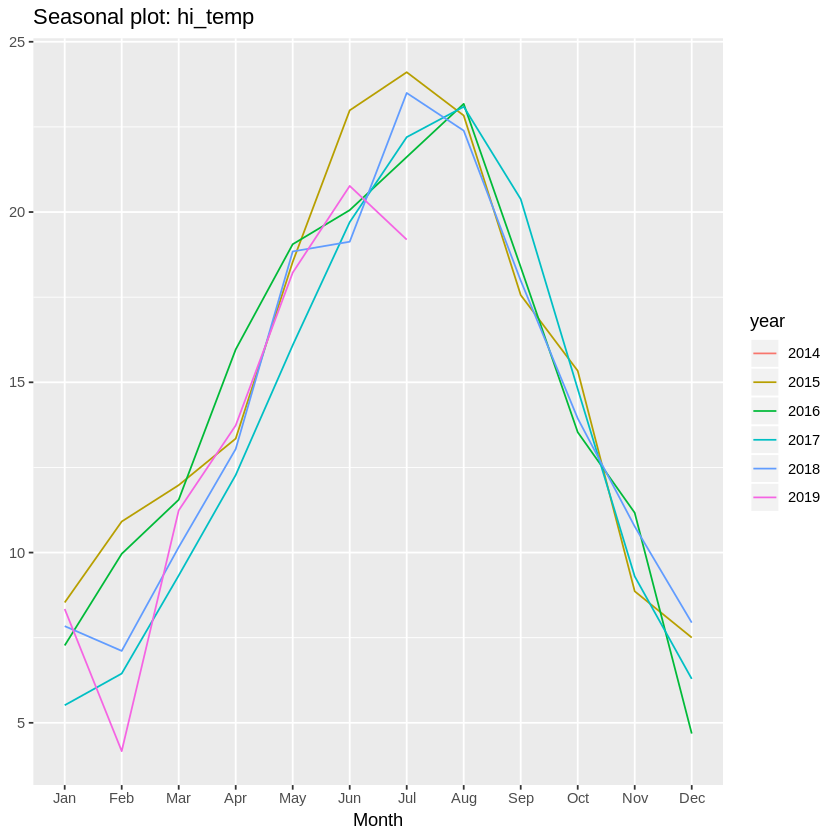

In [176]:
ggseasonplot(vic_bike_month[,'hi_temp']) + labs(title="Seasonal plot: hi_temp")

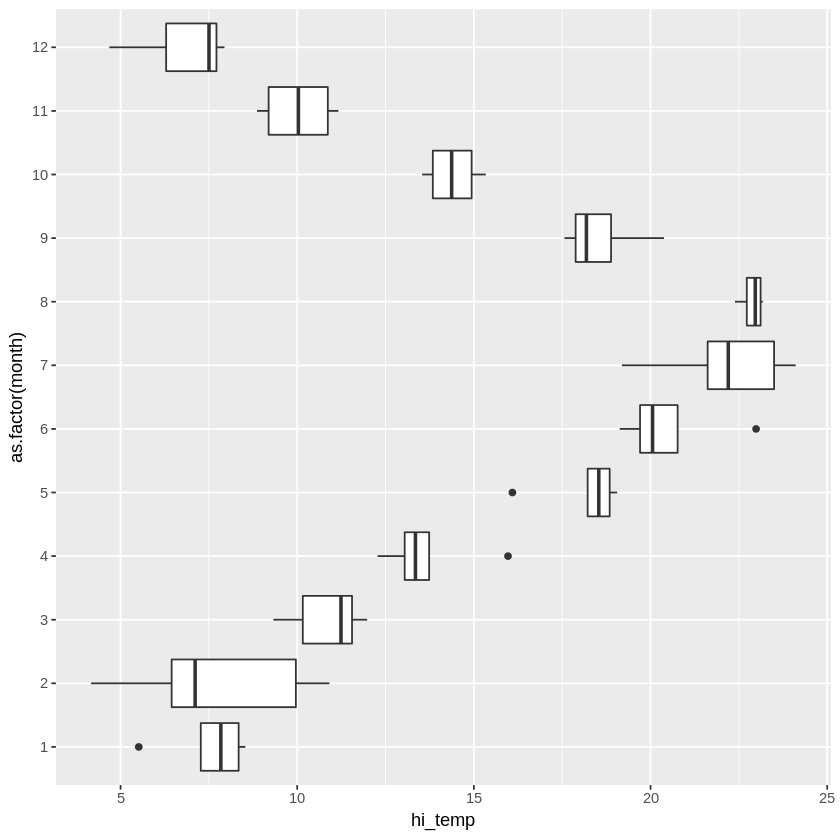

In [33]:
vic_bike_month %>% 
ggplot(aes(x = as.factor(month),  y = hi_temp)) + geom_boxplot( )+ coord_flip()

In [124]:
# bike_month %>% ggplot(aes(x = month, y = month.bikes, group = year )) +
# geom_area(aes(fill = year), position = "stack")+
# labs(title = "Number of Riders", x = "", y = "Riders") 